### PROJECT_ID   :  PTID-CDS-SEP-24-2088
### PROJECT_TITLE:  PREDICTING HEART DISEASES [PRCP-1016-HeartDieseasePred]

# BUISNESS CASE

### Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.
### Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.


## Our primary goal is to predict the binary class of heart diseases,whether the patient have the heart disease or not
## <font color="green">"0"</font> represents the patient has <font color="green">" NO HEART DISEASES "</font>.
## <font color="red">"1"</font>  represents the patient has <font color="red">" HEART DISEASES "</font>.

# IMPORT THE BASIC LIBRARIES

In [322]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [323]:
data1=pd.read_csv("labels.csv")

In [324]:
data1.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [325]:
data1.shape

(180, 2)

In [326]:
data2=pd.read_csv("values.csv")

In [327]:
data2.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [328]:
data2.shape

(180, 14)

In [329]:
data3=pd.concat([data2,data1],axis=1)
data3.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


In [330]:
data3.shape

(180, 16)

### Patient_id is the unique column from the dataset,so we need to drop the column

In [331]:
data=data3.drop("patient_id",axis=1)

In [332]:
data.shape

(180, 14)

In [333]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


### data-This is the proper input dataset after ignoring the "patient_id" column.

In [334]:
data.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [335]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

# DOMAIN ANALYSIS

#### 1) SLOPE_OF_PEAK_EXERCISES_ST_SEGMENTS- It gives the information about the heart's electrical activity during peak excercise
#### * Upsloping (value=1)   -  <font color="green">SAFE (normal response)</font>.The heart will receive the adequate blood flow.
#### * Flat  (value=2)       -  <font color="yellow">BORDER  (borderline and mild response)</font>.The heart will receive the low blood flow.
#### * Downsloping (value=3) -  <font color="red">DANGER(abormal and risky response)</font>.The heart will not receive the blood flow.

#### 2) THAL - THALLIUM STRESS TEST
#### * normal - <font color="green">Good blood flow</font>
#### * reversible_defect- <font color="yellow">Normal blood flow</font>
#### * fixed_defect -<font color="red">No blood flow</font>

#### 3) RESTING BLOOD PRESSURE-pressure circulating in the heart at the rest time
#### * Normal Resting Blood Pressure: <font color="green">Around 120/80 mmHg</font>.
#### * High Blood Pressure (Hypertension): <font color="red">130/80 mmHg or higher</font>.
#### * Low Blood Pressure (Hypotension): <font color="red">90/60 mmHg or lower</font>.

#### 4) CHEST_PAIN_TYPE
#### <font color="red">1-Typical Angina</font>
#### <font color="yellow">2-Atypical Angina</font>
#### <font color="green">3-Non-Anginal Pain</font>
#### <font color="red">4-Asymptomatic</font>


#### 5)NUM_MAJOR_VESSELS:THE NUMBER REPRESENTS HOW MANY MAJOR VESSELS GET AFFECTED


#### 6)FASTING_BLOOD_SUGAR_GT_120_MG_PER_DL:It refers the sugar in the blood level.
####     0 -<font color="green"><=120MG/DL.Normal</font>
####     1 -<font color="red">>120MG/DL.DIABETICS</font>

#### 7)RESTING_EKG_RESULTS:
#### 0: <font color="green">Normal EKG </font>.
#### 1: <font color="red">abnormality </font>.
#### 2: <font color="red">enlarged left ventricle </font>.

#### 8)SERUM_CHOLESTEROL_MG_PER_DL-cholesterol level present in blood
#### *<font color="green"> Desirable level: Less than 200 mg/dL </font>.
#### *<font color="yellow"> Borderline high: 200-239 mg/dL </font>.
#### *<font color="red"> High: 240 mg/dL or higher </font>.

#### 9)OLDPEAK_EQ_ST_DEPRESSION-ST deviation refers the lack of oxygen flow to the heart
#### *<font color="green"> 0 to 1 mm - Normal</font>
#### *<font color="red"> above to 1mm - Abnormal</font>

#### 10)SEX- Gender of the patient
#### * 0- Female
#### * 1- Male

#### 11)AGE-AGE OF THE PATIENT

#### 12)MAX_HEART_RATE_ACHIEVED-rate of heart beat per minute.The value depends on the age of the patient.

#### 13)EXERCISE_INDUCED_ANGINA:chest pain occurs during the exercise
#### * <font color="green"> 0-False</font>(No angina).
#### * <font color="red">   1-True </font>(angina is present).

#### 14)HEART_DISEASE_PRESENT - It refers to the output of the dataset.
#### * <font color="green">  0 -> no heart disease present </font>
#### * <font color="red">  	1 -> heart disease present  </font>


# BASIC CHECKS

In [336]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [337]:
data.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [338]:
data.shape

(180, 14)

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [340]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [341]:
data.slope_of_peak_exercise_st_segment.value_counts()

slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64

In [342]:
for i in data.columns:
    all_value_counts=data[i].value_counts()
    print(all_value_counts)
    print("-----------------------------------------------")

slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
-----------------------------------------------
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64
-----------------------------------------------
resting_blood_pressure
130    26
140    22
120    21
110    11
150    10
160     9
128     8
112     8
125     7
124     5
108     5
118     4
145     4
135     4
138     3
180     3
132     3
126     2
115     2
178     2
142     2
100     2
152     2
136     2
134     2
102     1
94      1
155     1
117     1
170     1
172     1
122     1
156     1
106     1
144     1
105     1
Name: count, dtype: int64
-----------------------------------------------
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64
-----------------------------------------------
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64
-----------------------------------------------
fasting_bl

In [343]:
for u in data.columns:
    all_unique=data[u].unique()
    print(u.upper(),":")
    print(all_unique)
    print("************************************")
    print("\n")

SLOPE_OF_PEAK_EXERCISE_ST_SEGMENT :
[1 2 3]
************************************


THAL :
['normal' 'reversible_defect' 'fixed_defect']
************************************


RESTING_BLOOD_PRESSURE :
[128 110 125 152 178 130 150 170 120 140 138 144 136 160 108 106 156 180
 112 122 124 135 105 115 126 172 145 118 134 100 155 132 102  94 117 142]
************************************


CHEST_PAIN_TYPE :
[2 3 4 1]
************************************


NUM_MAJOR_VESSELS :
[0 3 2 1]
************************************


FASTING_BLOOD_SUGAR_GT_120_MG_PER_DL :
[0 1]
************************************


RESTING_EKG_RESULTS :
[2 0 1]
************************************


SERUM_CHOLESTEROL_MG_PER_DL :
[308 214 304 223 270 180 258 276 326 219 302 226 335 236 231 200 234 253
 204 319 233 228 245 211 303 205 185 175 225 203 325 230 222 126 209 269
 255 243 252 265 417 267 261 149 281 311 315 330 256 239 295 197 564 305
 283 160 254 282 322 250 188 220 199 215 218 196 266 229 259 268 177 168
 26

In [344]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

# EDA

In [346]:
print(len(data.columns))
data.columns

14


Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

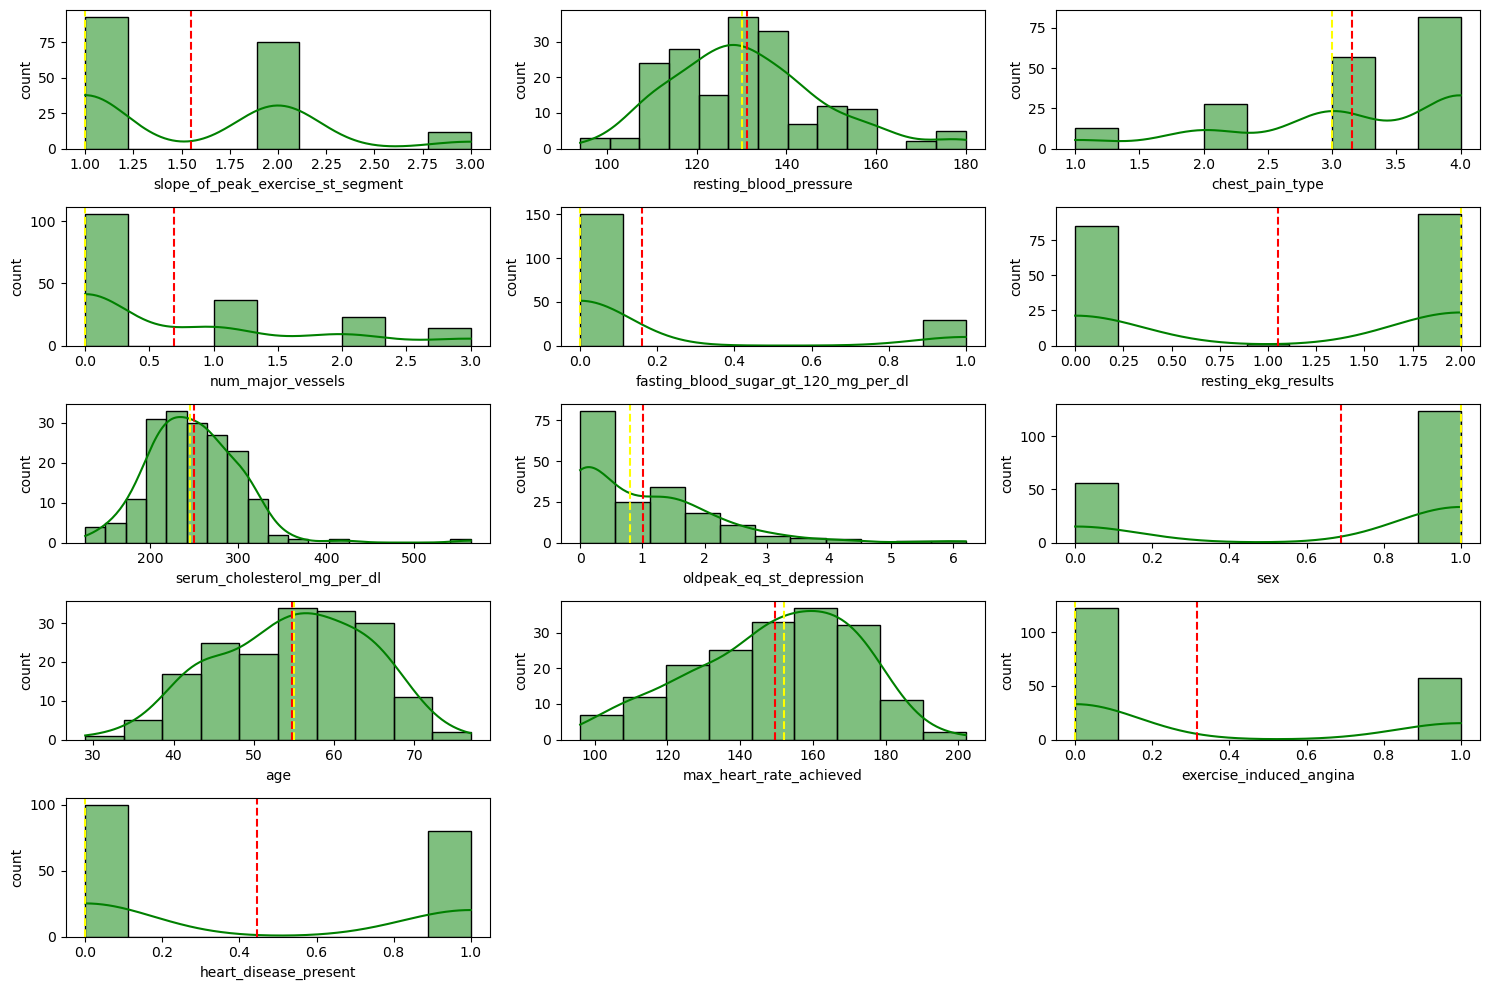

In [347]:
plt.figure(figsize=(15,10),facecolor="white")
plot_num=1
for column in data.drop("thal",axis=1):
    if plot_num<=len(data.columns):
        ax=plt.subplot(5,3,plot_num)
        sns.histplot(data=data,x=column,color="green",kde=True)
        plt.axvline(np.mean(data[column]), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
        plt.axvline(np.median(data[column]), color='yellow', linestyle='dashed', linewidth=1.5, label='Median')
        
        plt.xlabel(column)
        plt.ylabel("count")
    plot_num+=1
plt.tight_layout()
plt.show()

### From the above histogram diagram,We can say that the data is not normal because the data is in SKEWED TYPE.
### In the AGE column,The mean and the median are somewhat equal value.

In [348]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

(200.0, 300.0)

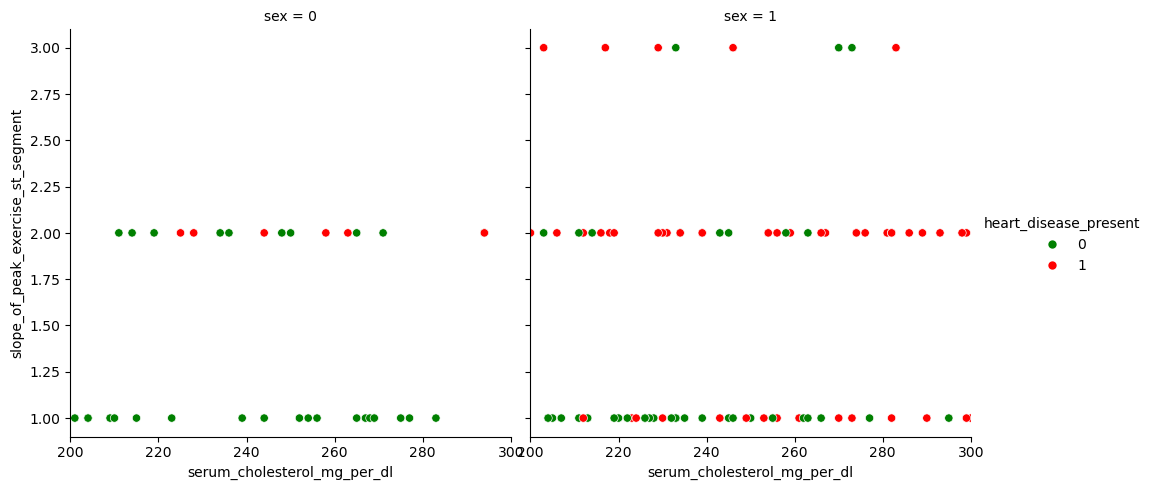

In [349]:
sns.relplot(data=data,x="serum_cholesterol_mg_per_dl",y='slope_of_peak_exercise_st_segment',col="sex",col_order=[0,1],hue="heart_disease_present",
            palette=["green","red"])
plt.xlim(200,300)

#### Male with serum_chlesterol_mg_per_dl more than 250 mg_per_dl at slope_of_element (value=2) are affected with heart diseases.

<Axes: xlabel='sex', ylabel='heart_disease_present'>

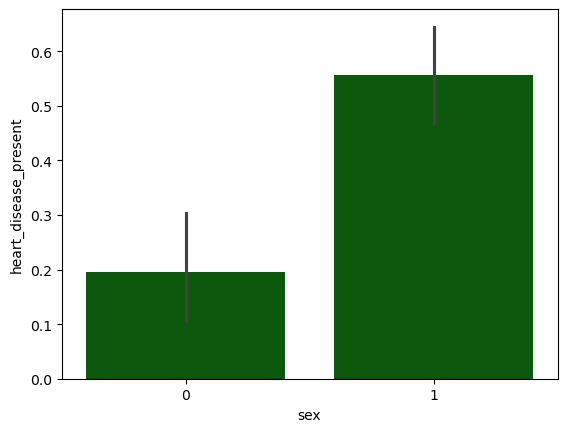

In [350]:
sns.barplot(data=data,x="sex",y="heart_disease_present",color="darkgreen",)

#### As per dataset,male suffered heart diseases more than the female

<Axes: xlabel='thal', ylabel='age'>

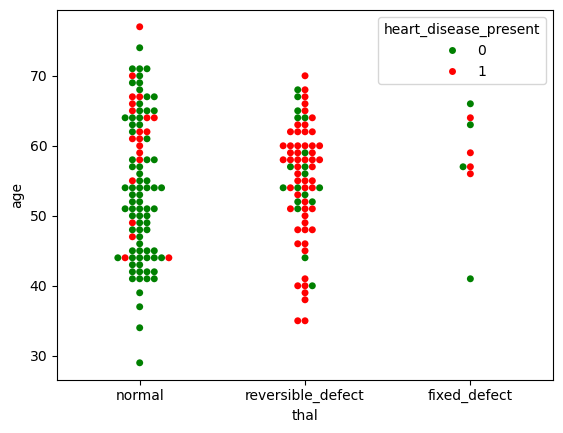

In [351]:
sns.swarmplot(data=data,x="thal",y="age",hue="heart_disease_present",palette=["green","red"])

#### At reversible_defect in thallium test,the swarm plot shows more number of heart diseases

In [352]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

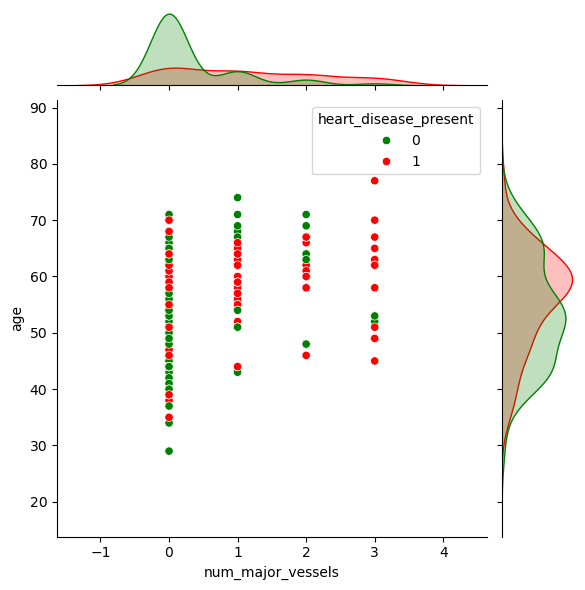

In [353]:
sns.jointplot(data=data,x="num_major_vessels",y="age",hue="heart_disease_present",palette=["green","red"])


#### The person with 3 num of major vessels affected have suffered a heart diseases.
#### The person with age of range of 55 to 60 suffers a heart diseases at every level of num_major_vessels

In [354]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [355]:
num_cols=data.select_dtypes(include=["int","float"])

In [356]:
pair_col=data[["slope_of_peak_exercise_st_segment",
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression','sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina','heart_disease_present']]

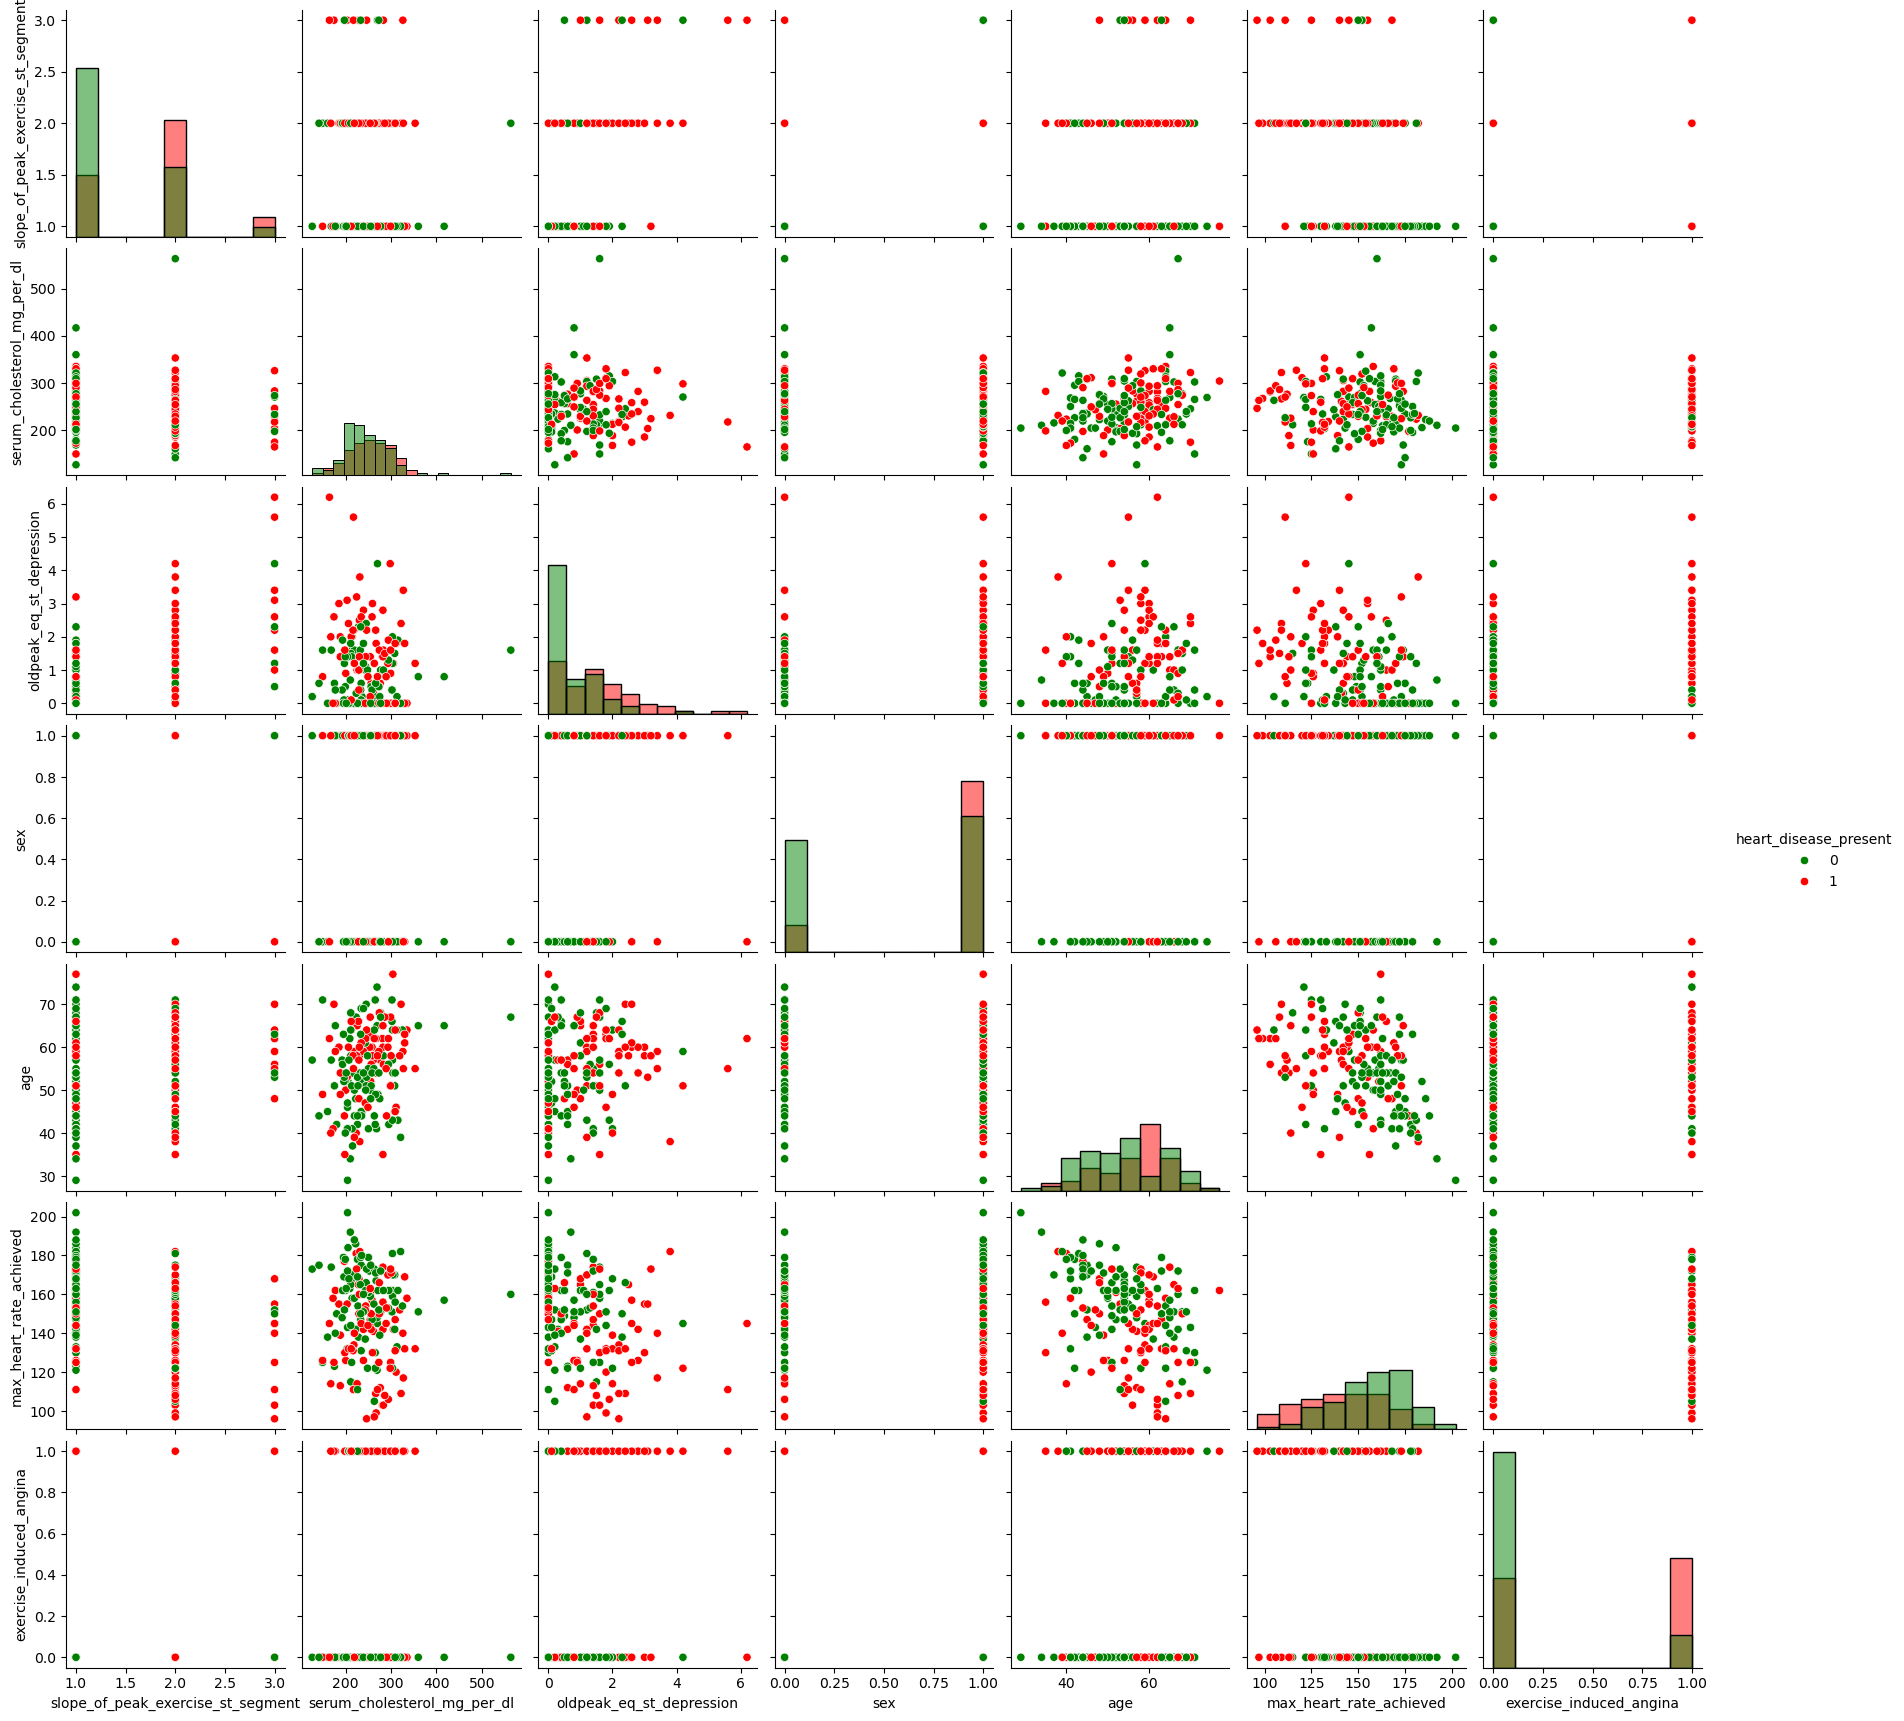

In [357]:
sns.pairplot(data=pair_col,hue="heart_disease_present",palette=["green","red"],diag_kind="hist")
plt.show()

#### The person with the value of exercise_induced_angina 1 maximum suffers a heart diseases at any range in the level of serum_cholesterol_mg_per_dl.
#### When the person have the chest pain during exercises with oldpeak_eq_st_depression more than 1 sufers from heart diseases.
#### The person with value of 1 in exercise_induced_angina majorly suffers from the heart diseases.
#### Male with the less than 140 value in the max_heart_rate_achieved suffers from heart diseases.
####
####

In [358]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

<Axes: xlabel='age', ylabel='slope_of_peak_exercise_st_segment'>

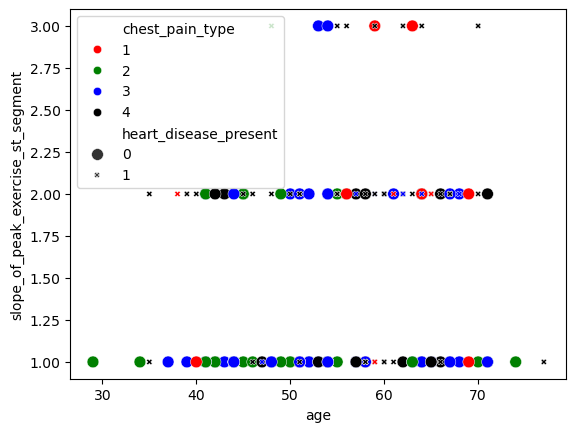

In [359]:
sns.scatterplot(data=data,y="slope_of_peak_exercise_st_segment",x="age",hue="chest_pain_type",palette=["red","green","blue","black"],size="heart_disease_present",
                style="heart_disease_present")

#### the person with 4th chest pain suffers heavily on heart diseases

In [360]:
a=data.chest_pain_type.value_counts()
sizes=list(a)
print(a)
sizes

chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64


[82, 57, 28, 13]

In [361]:
labels=data.chest_pain_type.unique()
print(labels)

[2 3 4 1]


In [362]:
sort_1=sorted(labels,reverse=True)
print(sort_1)

[4, 3, 2, 1]


([<matplotlib.patches.Wedge at 0x1bca1149910>,
 [Text(0.18092502053428394, 1.287348490869768, '4'),
  Text(-0.8301805352420651, -0.7216649353440961, '3'),
  Text(0.6465637858537406, -0.8899186877588753, '2'),
  Text(1.0718070804020818, -0.24744612019582213, '1')],
 [Text(0.11133847417494395, 0.7922144559198573, '45.6%'),
  Text(-0.45282574649567187, -0.39363541927859785, '31.7%'),
  Text(0.35267115592022213, -0.4854101933230228, '15.6%'),
  Text(0.584622043855681, -0.13497061101590296, '7.2%')])

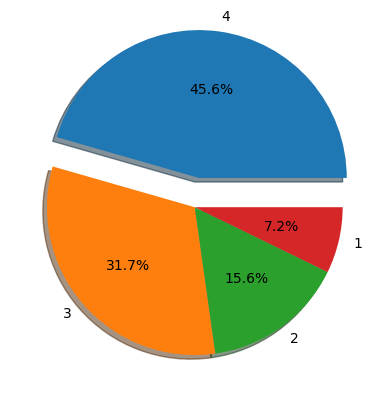

In [363]:
fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=sort_1,explode=[0.2,0,0,0],shadow=True,autopct="%1.1f%%")

#### The 45.6% people from the dataset has suffered lot from the 4th type chest pain

# DATA PREPROCESSING

### CHECKING THE NULL VALUES:

In [364]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [365]:
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

### CHECK FOR DUPLICATE:

In [366]:
data.duplicated().sum()

0

#### There is no null values and no duplicate values in the dataset

## FINDING THE OUTLIERS:

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [368]:
num_cols=data.select_dtypes(include=["int","float"])
num_cols.columns

Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

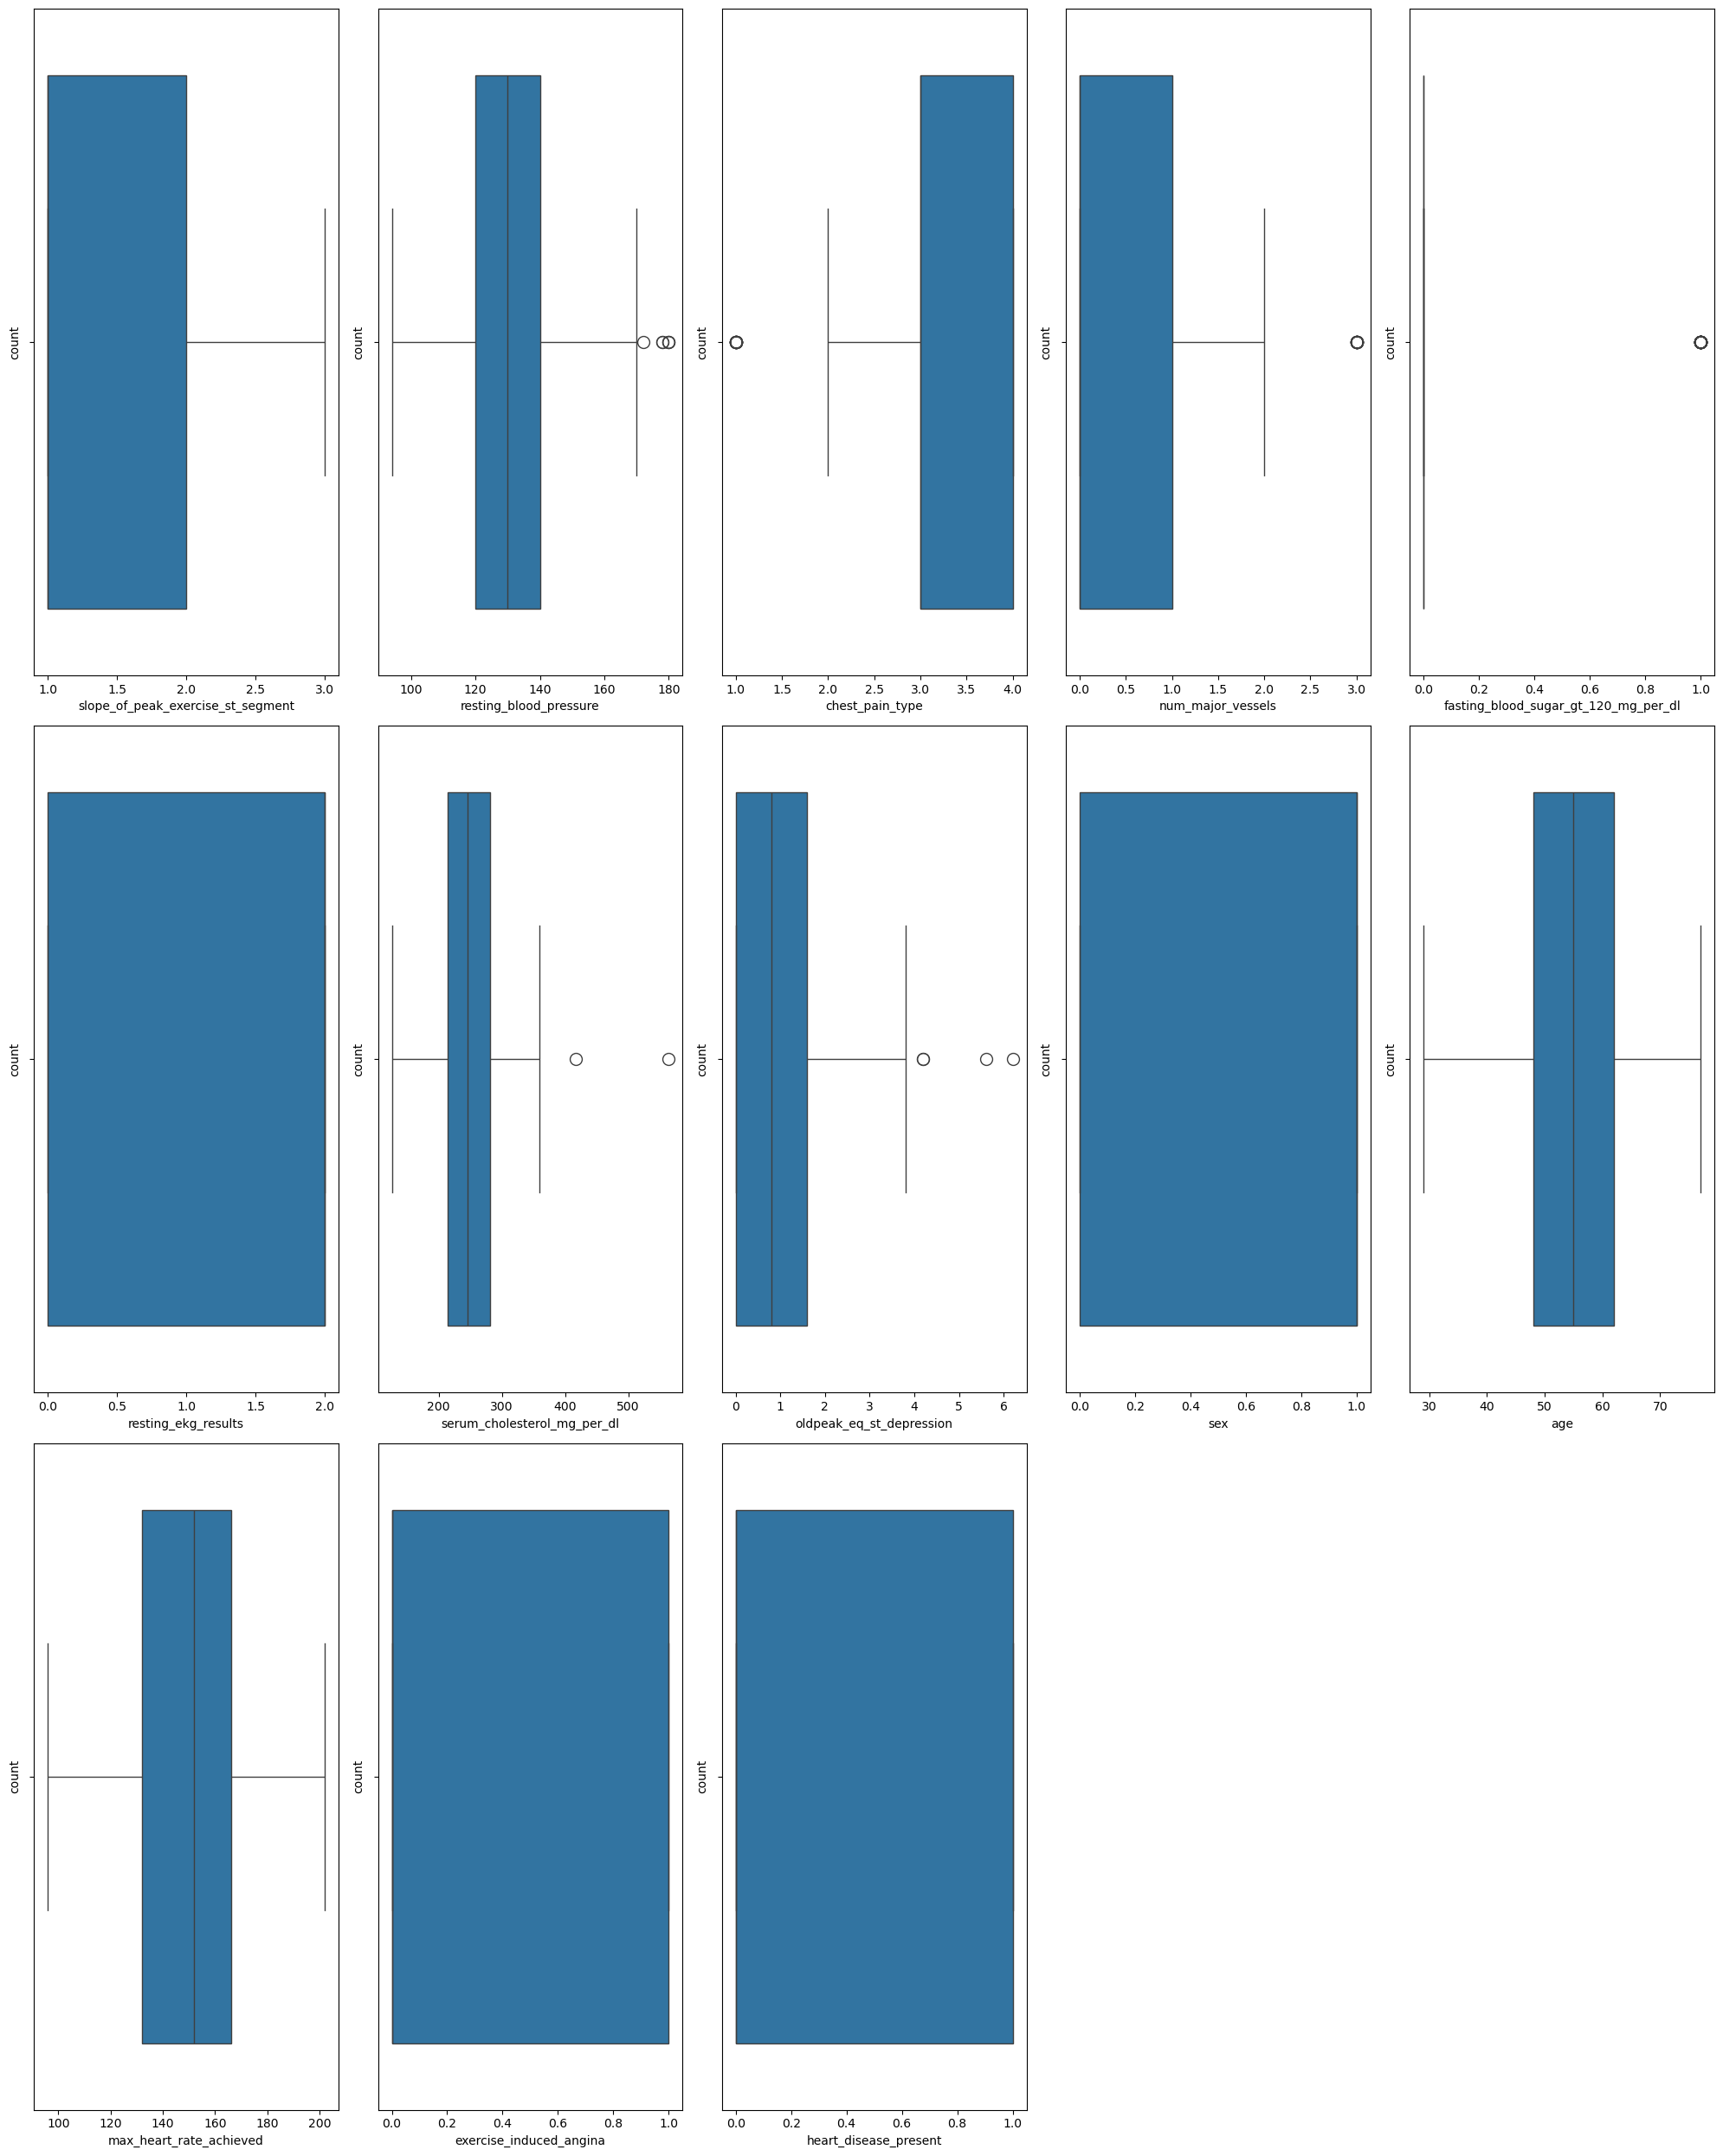

In [369]:
plt.figure(figsize=(20,25),facecolor="white")
box_number=1
for col in data.drop("thal",axis=1):
    if box_number<=13:
        ax=plt.subplot(3,5,box_number)
        sns.boxplot(data=data,x=col,flierprops=dict(marker='o', color='green', markersize=10))
        plt.xlabel(col)
        plt.ylabel("count")
    box_number+=1
plt.tight_layout()

#### The column which have the outliers we considered are:
#### 1.resting_blood_pressure
#### 2.serum_cholesterol_mg_per_dl
#### 3.oldpeak_eq_st_depression


In [370]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

# OUTLIERS REMOVAL:

In [371]:
data['resting_blood_pressure'].describe()

count    180.000000
mean     131.311111
std       17.010443
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: resting_blood_pressure, dtype: float64

Text(0.5, 1.0, 'boxplot of resting_blood_pressure')

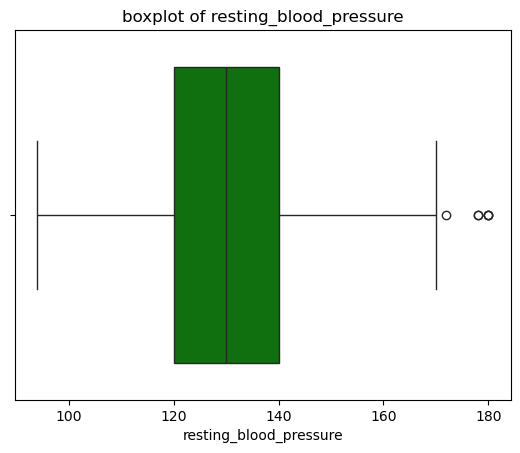

In [372]:
sns.boxplot(data=data,x='resting_blood_pressure',color="green")
plt.title("boxplot of resting_blood_pressure")

In [373]:
q1_rbp=data['resting_blood_pressure'].quantile(0.25)
q3_rbp=data['resting_blood_pressure'].quantile(0.75)

In [374]:
print(q1_rbp,q3_rbp)

120.0 140.0


In [375]:
iqr_rbp=q3_rbp-q1_rbp
print(iqr_rbp)

20.0


In [376]:
ll_rbp=q1_rbp-(1.5*iqr_rbp)
ul_rbp=q3_rbp+(1.5*iqr_rbp)
print("ll_rbp:",ll_rbp,"\n""ul_rbp:",ul_rbp)

ll_rbp: 90.0 
ul_rbp: 170.0


In [377]:
med_rbp=np.median(data['resting_blood_pressure'].dropna())
med_rbp

130.0

In [378]:
data.loc[(data['resting_blood_pressure']<ll_rbp) | (data['resting_blood_pressure']>ul_rbp),'resting_blood_pressure']=med_rbp

Text(0.5, 1.0, 'boxplot of serum_cholesterol_mg_per_dl')

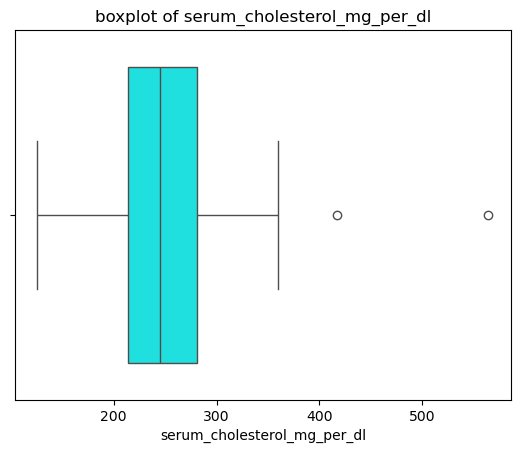

In [379]:
sns.boxplot(data=data,x='serum_cholesterol_mg_per_dl',color="cyan")
plt.title("boxplot of serum_cholesterol_mg_per_dl")

In [380]:
data["serum_cholesterol_mg_per_dl"].describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: serum_cholesterol_mg_per_dl, dtype: float64

In [381]:
q1_sc=data['serum_cholesterol_mg_per_dl'].quantile(0.25)
q3_sc=data['serum_cholesterol_mg_per_dl'].quantile(0.75)
print(q1_sc,q3_sc)

213.75 281.25


In [382]:
iqr_sc=q3_sc-q1_sc
print(iqr_sc)

67.5


In [383]:
ll_sc=q1_sc-(1.5*iqr_sc)
ul_sc=q3_sc+(1.5*iqr_sc)
print("ll_sc:",ll_sc,"\n""ul_sc:",ul_sc)

ll_sc: 112.5 
ul_sc: 382.5


In [384]:
med_sc=np.median(data['serum_cholesterol_mg_per_dl'].dropna())
med_sc

245.5

In [385]:
data.loc[(data["serum_cholesterol_mg_per_dl"]<ll_sc) | (data["serum_cholesterol_mg_per_dl"]>ul_sc),"serum_cholesterol_mg_per_dl"]=med_sc

Text(0.5, 1.0, 'boxplot of oldpeak_eq_st_depression')

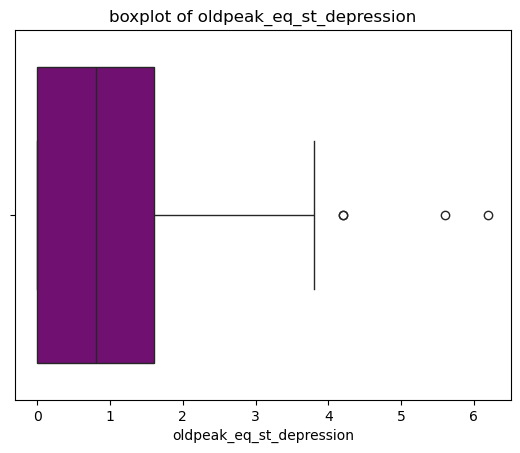

In [386]:
sns.boxplot(data=data,x='oldpeak_eq_st_depression',color="purple")
plt.title("boxplot of oldpeak_eq_st_depression")

In [387]:
data['oldpeak_eq_st_depression'].describe()

count    180.000000
mean       1.010000
std        1.121357
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak_eq_st_depression, dtype: float64

In [388]:
q1_oldpeak=data['oldpeak_eq_st_depression'].quantile(0.25)
q3_oldpeak=data['oldpeak_eq_st_depression'].quantile(0.75)
print(q1_oldpeak,q3_oldpeak)

0.0 1.6


In [389]:
iqr_oldpeak=q3_oldpeak-q1_oldpeak
print(iqr_oldpeak)

1.6


In [390]:
ll_oldpeak=q1_oldpeak-(1.5*iqr_oldpeak)
ul_oldpeak=q3_oldpeak+(1.5*iqr_oldpeak)
print("ll_oldpeak:",ll_oldpeak,"\n""ul_oldpeak:",ul_oldpeak)

ll_oldpeak: -2.4000000000000004 
ul_oldpeak: 4.0


In [391]:
med_oldpeak=np.median(data['oldpeak_eq_st_depression'].dropna())
med_oldpeak

0.8

In [392]:
data.loc[(data["oldpeak_eq_st_depression"]<ll_oldpeak) | (data["oldpeak_eq_st_depression"]>ul_oldpeak),"oldpeak_eq_st_depression"]=4.0

In [393]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,reversible_defect,130,1,0,0,2,270.0,4.0,1,59,145,0,0


In [394]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

# SCALING THE DATA:

## scaling the dataset by MINMAX SCALAR OR NORMALISATION METHOD

In [395]:
from sklearn.preprocessing import MinMaxScaler

In [396]:
scale=MinMaxScaler()

### These are the below columns we are going to do the scaling by minmax scaler:
* resting_blood_pressure
* serum_cholesterol_mg_per_dl
* oldpeak_eq_st_depression
* age
* max_heart_rate_achieved


## BEFORE SCALING THE LISTED COLUMNS

In [397]:
data[["resting_blood_pressure","serum_cholesterol_mg_per_dl","oldpeak_eq_st_depression","age","max_heart_rate_achieved"]]

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,128,308.0,0.0,45,170
1,110,214.0,1.6,54,158
2,125,304.0,0.0,77,162
3,152,223.0,0.0,40,181
4,130,270.0,4.0,59,145
...,...,...,...,...,...
175,125,254.0,0.2,67,163
176,130,327.0,3.4,55,117
177,125,309.0,1.8,64,131
178,124,255.0,0.0,48,175


## AFTER SCALING THE LISTED COLUMNS:

In [398]:
data[["resting_blood_pressure","serum_cholesterol_mg_per_dl","oldpeak_eq_st_depression","age","max_heart_rate_achieved"]]=scale.fit_transform(data[["resting_blood_pressure","serum_cholesterol_mg_per_dl","oldpeak_eq_st_depression","age","max_heart_rate_achieved"]])

In [399]:
data[["resting_blood_pressure","serum_cholesterol_mg_per_dl","oldpeak_eq_st_depression","age","max_heart_rate_achieved"]]

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,0.447368,0.777778,0.00,0.333333,0.698113
1,0.210526,0.376068,0.40,0.520833,0.584906
2,0.407895,0.760684,0.00,1.000000,0.622642
3,0.763158,0.414530,0.00,0.229167,0.801887
4,0.473684,0.615385,1.00,0.625000,0.462264
...,...,...,...,...,...
175,0.407895,0.547009,0.05,0.791667,0.632075
176,0.473684,0.858974,0.85,0.541667,0.198113
177,0.407895,0.782051,0.45,0.729167,0.330189
178,0.394737,0.551282,0.00,0.395833,0.745283


### 
After using the minmax scaler,the range of the value is from 0 to 1.

In [400]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0,0
1,2,normal,0.210526,3,0,0,0,0.376068,0.4,0,0.520833,0.584906,0,0
2,1,normal,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1,1
3,1,reversible_defect,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0,1
4,3,reversible_defect,0.473684,1,0,0,2,0.615385,1.0,1,0.625000,0.462264,0,0


# HEATMAP 

In [401]:
num_column=data.select_dtypes(include=["int","float"])
num_column

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0.447368,2,0,0,2,0.777778,0.00,1,0.333333,0.698113,0,0
1,2,0.210526,3,0,0,0,0.376068,0.40,0,0.520833,0.584906,0,0
2,1,0.407895,4,3,0,2,0.760684,0.00,1,1.000000,0.622642,1,1
3,1,0.763158,4,0,0,0,0.414530,0.00,1,0.229167,0.801887,0,1
4,3,0.473684,1,0,0,2,0.615385,1.00,1,0.625000,0.462264,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,0.407895,4,2,1,0,0.547009,0.05,1,0.791667,0.632075,0,1
176,2,0.473684,4,0,0,1,0.858974,0.85,0,0.541667,0.198113,1,1
177,2,0.407895,3,0,0,0,0.782051,0.45,1,0.729167,0.330189,1,1
178,1,0.394737,3,2,1,0,0.551282,0.00,1,0.395833,0.745283,0,0


In [402]:
num_heat=num_column.drop("heart_disease_present",axis=1)

In [403]:
num_heat.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0
1,2,0.210526,3,0,0,0,0.376068,0.4,0,0.520833,0.584906,0
2,1,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1
3,1,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0
4,3,0.473684,1,0,0,2,0.615385,1.0,1,0.625000,0.462264,0


<Axes: >

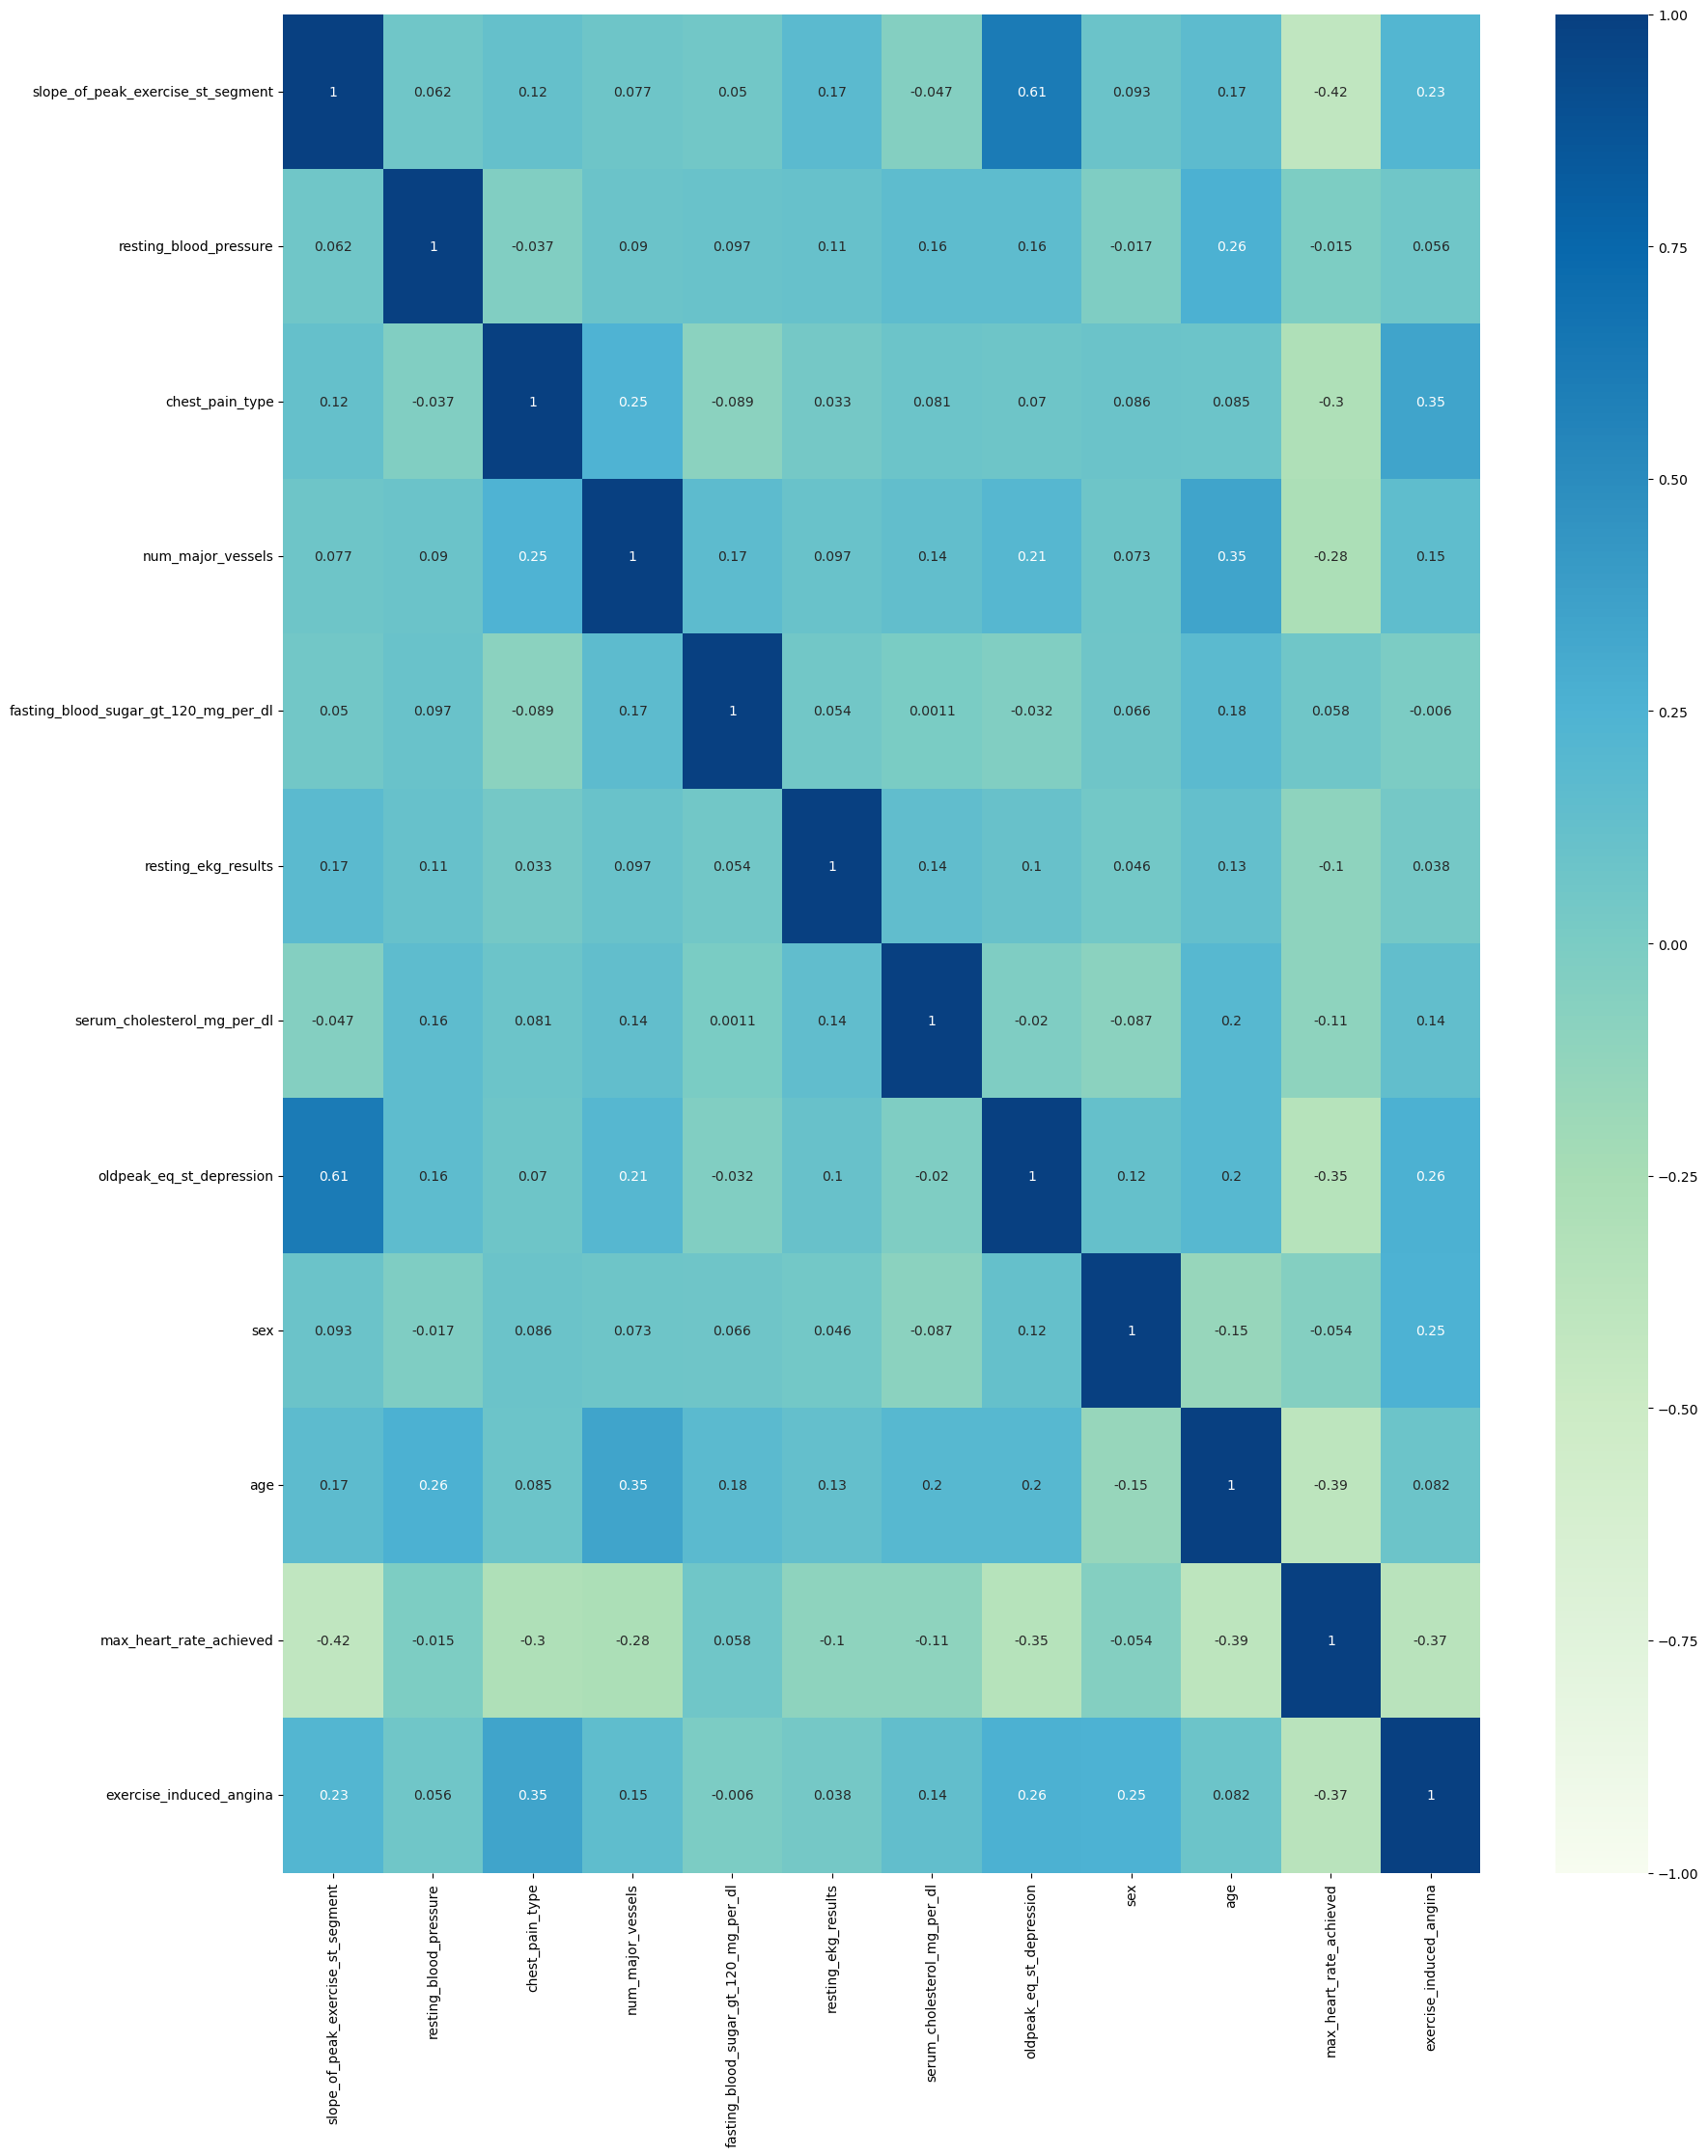

In [404]:
plt.figure(figsize=(20,25),facecolor="white")
sns.heatmap(num_heat.corr(),annot=True,vmin=-1,cmap="GnBu")

In [405]:
h_corr=num_heat.corr()

In [406]:
h_corr

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
slope_of_peak_exercise_st_segment,1.000000,0.061536,0.121207,0.076832,0.050199,0.172191,-0.047307,0.614943,0.093340,0.169918,-0.418102,0.225459
resting_blood_pressure,0.061536,1.000000,-0.037038,0.090367,0.096842,0.113544,0.163281,0.159653,-0.016618,0.259479,-0.014901,0.056117
chest_pain_type,0.121207,-0.037038,1.000000,0.249061,-0.088992,0.033379,0.081077,0.070475,0.086057,0.085001,-0.301792,0.346266
num_major_vessels,0.076832,0.090367,0.249061,1.000000,0.169792,0.096656,0.135630,0.207725,0.073107,0.347355,-0.275687,0.153407
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.096842,-0.088992,0.169792,1.000000,0.053864,0.001109,-0.032352,0.066010,0.176101,0.058369,-0.005956
resting_ekg_results,0.172191,0.113544,0.033379,0.096656,0.053864,1.000000,0.141028,0.103162,0.045786,0.126856,-0.102766,0.037773
serum_cholesterol_mg_per_dl,-0.047307,0.163281,0.081077,0.135630,0.001109,0.141028,1.000000,-0.020217,-0.087374,0.200082,-0.108363,0.137476
oldpeak_eq_st_depression,0.614943,0.159653,0.070475,0.207725,-0.032352,0.103162,-0.020217,1.000000,0.117856,0.195838,-0.349878,0.264079
sex,0.093340,-0.016618,0.086057,0.073107,0.066010,0.045786,-0.087374,0.117856,1.000000,-0.148997,-0.053960,0.251096
age,0.169918,0.259479,0.085001,0.347355,0.176101,0.126856,0.200082,0.195838,-0.148997,1.000000,-0.394630,0.081811


In [407]:
filtered_hm=np.where(np.abs(num_heat.corr())>0.9,num_heat.corr(),np.nan)
filtered_hm

array([[ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.]])

### There is no correlation between any of the features,So we no need to remove any features

# CONVERSION OF CATEGORICAL DATA TO NUMERIC DATA:

#### The "thal" features contains the datatype in categorical form ,so we need to convert it into the numerical datatypes.
#### LABEL ENCODER is used for the numeric conversion from categorical conversion.

# LABEL ENCODER

In [408]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0,0
1,2,normal,0.210526,3,0,0,0,0.376068,0.4,0,0.520833,0.584906,0,0
2,1,normal,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1,1
3,1,reversible_defect,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0,1
4,3,reversible_defect,0.473684,1,0,0,2,0.615385,1.0,1,0.625000,0.462264,0,0


In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    float64
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    float64
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    float64
 11  max_heart_rate_achi

## "thal" feature contains the categorical form of datatype.

In [410]:
data["thal"].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [411]:
from sklearn.preprocessing import LabelEncoder

In [412]:
lc=LabelEncoder()

### BEFORE APPLYING THE LABEL ENCODER

In [413]:
data.thal.head(10)

0               normal
1               normal
2               normal
3    reversible_defect
4    reversible_defect
5               normal
6    reversible_defect
7         fixed_defect
8    reversible_defect
9               normal
Name: thal, dtype: object

### APPLYING THE LABEL ENCODER

In [414]:
data["thal"]=lc.fit_transform(data["thal"])

### AFTER APPLYING THE LABEL ENCODER

In [415]:
data["thal"].head(10)

0    1
1    1
2    1
3    2
4    2
5    1
6    2
7    0
8    2
9    1
Name: thal, dtype: int32

In [416]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0,0
1,2,1,0.210526,3,0,0,0,0.376068,0.4,0,0.520833,0.584906,0,0
2,1,1,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1,1
3,1,2,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0,1
4,3,2,0.473684,1,0,0,2,0.615385,1.0,1,0.625000,0.462264,0,0


In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int32  
 2   resting_blood_pressure                180 non-null    float64
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    float64
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    float64
 11  max_heart_rate_achi

### Now all the columns have the int or float datatype.There is no categorical data types.Now we can use this dataset for the model creation

# MODEL CREATION

In [418]:
x=data.drop("heart_disease_present",axis=1)
y=data.heart_disease_present

In [419]:
x.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0
1,2,1,0.210526,3,0,0,0,0.376068,0.4,0,0.520833,0.584906,0
2,1,1,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1
3,1,2,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0
4,3,2,0.473684,1,0,0,2,0.615385,1.0,1,0.625000,0.462264,0


In [420]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [421]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [422]:
x_train.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
117,1,2,0.210526,4,0,0,2,0.196581,0.00,1,0.250000,0.584906,0
65,1,2,0.421053,4,0,0,2,0.666667,0.00,1,0.125000,0.566038,1
67,2,1,0.276316,4,0,0,0,0.756410,0.30,1,0.291667,0.801887,0
31,2,2,0.736842,4,3,0,2,0.423077,0.25,0,0.750000,0.169811,0
12,1,1,0.605263,3,0,0,0,0.893162,0.00,1,0.729167,0.584906,0


In [423]:
x_train.shape

(144, 13)

In [424]:
x_test.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
19,1,1,0.552632,2,2,1,2,0.824786,0.0,0,0.604167,0.528302,0
42,1,1,0.210526,3,1,1,2,0.594017,0.0,0,0.875000,0.320755,0
153,1,1,0.236842,4,1,0,2,0.700855,0.0,1,0.312500,0.537736,0
78,2,2,0.671053,4,2,0,2,0.666667,0.7,1,0.645833,0.433962,1
145,1,1,0.605263,2,2,0,0,0.294872,0.0,0,0.708333,0.783019,0


In [425]:
x_test.shape

(36, 13)

In [426]:
y_train.head()

117    1
65     1
67     0
31     1
12     1
Name: heart_disease_present, dtype: int64

In [427]:
y_test.head()

19     1
42     0
153    1
78     1
145    0
Name: heart_disease_present, dtype: int64

In [428]:
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (144,)
y_test (36,)


# LOGISTIC REGRESSION

In [429]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [430]:
lr.fit(x_train,y_train)

LogisticRegression()

In [431]:
y_predict_lr=lr.predict(x_test)

In [432]:
y_predict_lr

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

# EVALUATION METRICS

In [433]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

In [434]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_predict_lr)*100)

ACCURACY_SCORE:  86.11111111111111


In [435]:
print("F1__SCORE: ",f1_score(y_test,y_predict_lr)*100)

F1__SCORE:  85.71428571428571


In [436]:
print("CLASSIFICATION_REPORT: ",classification_report(y_test,y_predict_lr))

CLASSIFICATION_REPORT:                precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [437]:
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_predict_lr))

CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       5  15


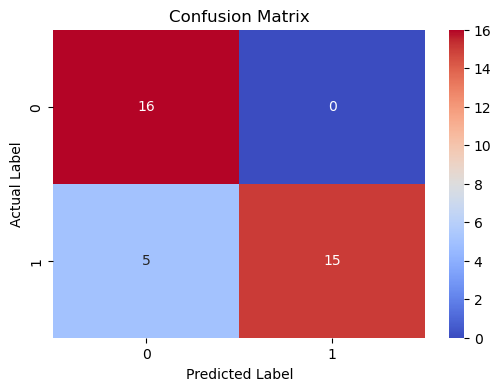

In [438]:
cm_lr=confusion_matrix(y_test,y_predict_lr)
cm_lr_df=pd.DataFrame(cm_lr,index=[0,1],columns=[0,1])
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr,annot=True,fmt="d",cmap="coolwarm")
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# LOGISTIC REGRESSION BY APPLYING THE SMOTE

In [439]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [440]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [441]:
from collections import Counter
print("y_train",Counter(y_train))
print("y_smote",Counter(y_smote))

y_train Counter({0: 84, 1: 60})
y_smote Counter({1: 84, 0: 84})


In [442]:
lr_sm=LogisticRegression()

In [443]:
lr_sm.fit(x_smote,y_smote)

LogisticRegression()

In [444]:
y_pre_lrsm=lr_sm.predict(x_test)
y_pre_lrsm

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

### EVALUATION METRICS FOR LOGISTICS REGRESSION BY SMOTE VALUES

In [445]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_lrsm)*100)
print("F1__SCORE: ",f1_score(y_test,y_pre_lrsm)*100)

ACCURACY_SCORE:  88.88888888888889
F1__SCORE:  88.8888888888889


In [446]:
print("CLASSIFICATION_REPORT: ",classification_report(y_test,y_pre_lrsm))

CLASSIFICATION_REPORT:                precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



In [447]:
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_lrsm))

CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       4  16


# SUPPORT VECTOR MACHINE WIHOUT SMOTE:

In [448]:
from sklearn.svm import SVC
svc=SVC(random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [449]:
y_pre_svc=svc.predict(x_test)
y_pre_svc

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [450]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_svc)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_svc)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_svc))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  85.71428571428571



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       5  15


In [451]:
pd.crosstab(y_test,y_pre_svc)

col_0,0,1
heart_disease_present,,
0,16,0
1,5,15


## SVC with Hyperparameter tuning

In [452]:
from sklearn.model_selection import cross_val_score
k_values=range(2,31)
cv_scores_svc=[]
for i in k_values:
    scores_svc=cross_val_score(svc,x_train,y_train,cv=i,scoring="f1")
    cv_scores_svc.append(scores_svc.mean())
    print(i,scores_svc.mean(),scores_svc.std())
best_k_svc=k_values[cv_scores_svc.index(max(cv_scores_svc))]
print("The best cross_validation in SVC:",best_k_svc)

2 0.7859649122807018 0.01403508771929829
3 0.7740202693763066 0.03478759838230968
4 0.8055260831122901 0.0439951297414606
5 0.7850649350649351 0.03384938147588678
6 0.7967090929939227 0.03352673763365751
7 0.7827264239028946 0.06452464705764391
8 0.7763507326007326 0.09490623700812309
9 0.7679098679098679 0.1321415869431745
10 0.798018648018648 0.05267356121174862
11 0.7831072967436604 0.1102477618301056
12 0.7714405964405965 0.131956087424676
13 0.7662393162393162 0.15293056134365296
14 0.7530045351473923 0.1394495256049033
15 0.7502645502645502 0.1321809188290168
16 0.7598214285714285 0.14969232191898352
17 0.7620448179271708 0.1523250742002628
18 0.7666666666666667 0.16532338496878143
19 0.749749373433584 0.20788963813785952
20 0.7582142857142856 0.17570472776947185
21 0.7578231292517007 0.16559281988734137
22 0.7601731601731602 0.16960031260877234
23 0.7677018633540373 0.17269463767520105
24 0.7871031746031746 0.1578715617841168
25 0.7742857142857144 0.1501201332991971
26 0.7342490

In [453]:
from sklearn.model_selection import GridSearchCV
param_svc={
    "C":[0.0001,0.001,0.01,0.1,1,10,100,1000],
    "gamma":[10,1,0.1,0.001,0.0001]
}

In [454]:
grid_svc=GridSearchCV(svc,param_svc,verbose=1,scoring="f1",cv=4,n_jobs=-1)

In [455]:
grid_svc.fit(x_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [456]:
print("best_params:",grid_svc.best_params_)
print("best_estimators:",grid_svc.best_estimator_)
print("best_score",grid_svc.best_score_) 

best_params: {'C': 10, 'gamma': 0.1}
best_estimators: SVC(C=10, gamma=0.1, random_state=42)
best_score 0.8070658866995074


In [457]:
hp_svc=SVC(C=10, gamma=0.1, random_state=42)

In [458]:
hp_svc.fit(x_train,y_train)

SVC(C=10, gamma=0.1, random_state=42)

In [459]:
y_pre_hp_svc=hp_svc.predict(x_test)
y_pre_hp_svc

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [460]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_svc)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_svc)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_svc))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  85.71428571428571



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       5  15


In [461]:
print("CLASSIFICATION_REPORT: /n",classification_report(y_test,y_pre_hp_svc))

CLASSIFICATION_REPORT: /n               precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



## SUPPORT VECTOR MACHINE BY APPLYING THE SMOTE

### The smote steps has been applied in logistics regression, we can just excute that 

In [462]:
print("y_train:",Counter(y_train))
print("y_smote:",Counter(y_smote))

y_train: Counter({0: 84, 1: 60})
y_smote: Counter({1: 84, 0: 84})


In [463]:
svc_sm=SVC(random_state=42)

In [464]:
svc_sm.fit(x_smote,y_smote)

SVC(random_state=42)

In [465]:
y_pre_svc_sm=svc_sm.predict(x_test)
y_pre_svc_sm

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [466]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_svc_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_svc_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_svc_sm))

ACCURACY_SCORE:  88.88888888888889



F1__SCORE:  88.8888888888889



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       4  16


In [467]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,y_pre_svc_sm))

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



## SUPPORT VECTOR MACHINE BY APPLYING THE SMOTE AND USING THE HYPERPARAMETER TUNING

In [468]:
from sklearn.model_selection import cross_val_score
k_values_svc_sm=range(2,12)
cv_scores_svc_sm=[]
for i in k_values_svc_sm:
    scores_svc_sm=cross_val_score(SVC(random_state=42),x_smote,y_smote,cv=i,scoring="f1")
    cv_scores_svc_sm.append(scores_svc_sm.mean())
    print(i,scores_svc_sm.mean(),scores_svc_sm.std())
best_k_svc_sm=k_values_svc_sm[cv_scores_svc_sm.index(max(cv_scores_svc_sm))]
print("The best cross_validation in SVC for smote:",best_k_svc_sm)

2 0.8452161587526578 0.0018426647767540993
3 0.8638911308402836 0.030182644825034594
4 0.8535130968483209 0.02460872584573807
5 0.839840640068344 0.0451523361651878
6 0.8492914918202276 0.06483305103211652
7 0.8626086956521739 0.05323963323618932
8 0.8402255639097744 0.07938307187335109
9 0.8523162481366816 0.06686378120343776
10 0.8444281045751634 0.08457376332295699
11 0.8406720730250142 0.09704501499829117
The best cross_validation in SVC for smote: 3


In [469]:
from sklearn.model_selection import GridSearchCV
param_svc_sm={
    "C":[0.0001,0.001,0.01,0.1,1,10,100,1000],
    "gamma":[10,1,0.1,0.001,0.0001]
}

In [470]:
grid_svc_sm=GridSearchCV(svc_sm,param_svc_sm,verbose=1,scoring="f1",cv=6,n_jobs=-1)

In [471]:
grid_svc_sm.fit(x_smote,y_smote)

Fitting 6 folds for each of 40 candidates, totalling 240 fits


GridSearchCV(cv=6, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [472]:
print("best_params:",grid_svc_sm.best_params_)
print("best_estimators:",grid_svc_sm.best_estimator_)
print("best_score",grid_svc_sm.best_score_) 

best_params: {'C': 1, 'gamma': 0.1}
best_estimators: SVC(C=1, gamma=0.1, random_state=42)
best_score 0.8501727178738673


In [473]:
hp_svc_sm=SVC(C=10, gamma=0.1, random_state=42)

In [474]:
hp_svc_sm.fit(x_smote,y_smote)

SVC(C=10, gamma=0.1, random_state=42)

In [475]:
y_pre_hp_svc_sm=hp_svc_sm.predict(x_test)

In [476]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_svc_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_svc_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_svc_sm))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  85.71428571428571



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       5  15


In [477]:
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,y_pre_hp_svc_sm))

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



# DECISION TREE

In [478]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pre_dt=dt.predict(x_test)
y_pre_dt

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [479]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_dt)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_dt)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_dt))

ACCURACY_SCORE:  75.0



F1__SCORE:  72.72727272727273



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      15   1
1                       8  12


In [480]:
print("CLASSIFICATION_REPORT: /n",classification_report(y_test,y_pre_dt))

CLASSIFICATION_REPORT: /n               precision    recall  f1-score   support

           0       0.65      0.94      0.77        16
           1       0.92      0.60      0.73        20

    accuracy                           0.75        36
   macro avg       0.79      0.77      0.75        36
weighted avg       0.80      0.75      0.75        36



In [481]:
from sklearn.model_selection import cross_val_score
k_values=range(2,12)
cv_scores_dt=[]
for i in k_values:
    scores_dt=cross_val_score(DecisionTreeClassifier(random_state=42),x_train,y_train,cv=i,scoring="f1")
    cv_scores_dt.append(scores_dt.mean())
    print(i,scores_dt.mean(),scores_dt.std())
best_k_dt=k_values[cv_scores_dt.index(max(cv_scores_dt))]
print("The best cross_validation in DT:",best_k_dt)

2 0.622316384180791 0.05564971751412434
3 0.5977855201885239 0.08894197499777824
4 0.7008158508158507 0.06538731613367721
5 0.6549059829059829 0.05633316669819104
6 0.7399350649350649 0.08507711984375438
7 0.7109477124183007 0.10660706183971481
8 0.7049486461251167 0.12429615816186446
9 0.7492954757660639 0.08624923971469335
10 0.73008325008325 0.12305697045102487
11 0.7302606484424665 0.13140199495545773
The best cross_validation in DT: 9


## HYPERPARAMETER TUNING FOR DT 

In [482]:
from sklearn.model_selection import GridSearchCV

In [483]:
param_dt={
    "criterion":("gini","entropy"),
    "splitter":("best","random"),
    "max_depth":(list(range(1,20))),
    "min_samples_split":(list(range(1,10))),
    "min_samples_leaf":(list(range(1,10)))
 }


In [484]:
#grid_dt=GridSearchCV(DecisionTreeClassifier(random_state=42),param_dt,scoring="f1",cv=9,verbose=1,n_jobs=-1)

In [485]:

#grid_dt.fit(x_train,y_train)

print("best_params:",grid_dt.best_params_)
print("best_estimators:",grid_dt.best_estimator_)
print("best_score",grid_dt.best_score_)

In [486]:
hp_dt=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42,
                       splitter='random')

In [487]:
hp_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42,
                       splitter='random')

In [488]:
y_pre_hp_dt=hp_dt.predict(x_test)
y_pre_hp_dt

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [489]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_dt)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_dt)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_dt))

ACCURACY_SCORE:  80.55555555555556



F1__SCORE:  78.7878787878788



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       7  13


In [490]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_dt))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       1.00      0.65      0.79        20

    accuracy                           0.81        36
   macro avg       0.85      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36



## DECISION TREE BY APPLYING THE SMOTE

In [491]:
dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)
y_pre_dt_sm=dt_sm.predict(x_test)
y_pre_dt_sm

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [492]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_dt_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_dt_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_dt_sm))

ACCURACY_SCORE:  75.0



F1__SCORE:  76.92307692307692



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      12   4
1                       5  15


In [493]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_dt_sm))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.79      0.75      0.77        20

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



## DECISION TREE BY APPLYING THE SMOTE AND USING THE HYPERPARAMETER

In [494]:
k_values_dt_sm=range(2,21)
cv_scores_dt_sm=[]
for i in k_values_dt_sm:
    scores_dt_sm=cross_val_score(DecisionTreeClassifier(random_state=42),x_smote,y_smote,cv=i,scoring="f1")
    cv_scores_dt_sm.append(scores_dt_sm.mean())
    print(i,scores_dt_sm.mean(),scores_dt_sm.std())
best_k_dt_sm=k_values_dt_sm[cv_scores_dt_sm.index(max(cv_scores_dt_sm))]
print("The best cross_validation in DT_sMOTE:",best_k_dt_sm)

2 0.6339431801279192 0.016659229510635143
3 0.7141235813366961 0.062352321251566735
4 0.7546687808315715 0.07772506786515426
5 0.7704997788589119 0.05980455784900093
6 0.7422702866010246 0.07634255177381612
7 0.7288743278805391 0.08475283927100648
8 0.7922839955620276 0.09356020706890307
9 0.7345738082580188 0.09323504949413736
10 0.7540849673202614 0.10218886840304314
11 0.75095280536457 0.07433959254677194
12 0.7445845820845821 0.12039684640176955
13 0.7500352211890674 0.10880588648932779
14 0.7830954759526187 0.11477953187988921
15 0.7941665741665743 0.10510757812266683
16 0.7164731102231102 0.16240928716924127
17 0.7501325471913707 0.17064133734689946
18 0.7878547378547379 0.11149218668881224
19 0.7532011847801322 0.1535819271136495
20 0.7506673881673882 0.18503716979610177
The best cross_validation in DT_sMOTE: 15


In [495]:
param_dt_sm={
    "criterion":("gini","entropy"),
    "splitter":("best","random"),
    "max_depth":(list(range(1,9))),
    "min_samples_split":(list(range(1,5))),
    "min_samples_leaf":(list(range(1,10)))
 }


In [496]:
#grid_dt_sm=GridSearchCV(DecisionTreeClassifier(random_state=42),param_dt_sm,cv=18,scoring="f1",n_jobs=-1,verbose=3)

In [497]:
#grid_dt_sm.fit(x_smote,y_smote)

print("best_param:",grid_dt_sm.best_params_)
print("best_estimator:",grid_dt_sm.best_estimator_)
print("best_score:",grid_dt_sm.best_score_)

In [498]:
hp_dt_sm=DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=42,
                       splitter='random')

In [499]:
hp_dt_sm.fit(x_smote,y_smote)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=42,
                       splitter='random')

In [500]:
y_pre_hp_dt_sm=hp_dt_sm.predict(x_test)
y_pre_hp_dt_sm

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [501]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_dt_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_dt_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_dt_sm))

ACCURACY_SCORE:  72.22222222222221



F1__SCORE:  70.58823529411764



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      14   2
1                       8  12


In [502]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_dt_sm))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        16
           1       0.86      0.60      0.71        20

    accuracy                           0.72        36
   macro avg       0.75      0.74      0.72        36
weighted avg       0.76      0.72      0.72        36



# K_NEAREST NEIGHBORS

In [503]:
from sklearn.neighbors import KNeighborsClassifier

7


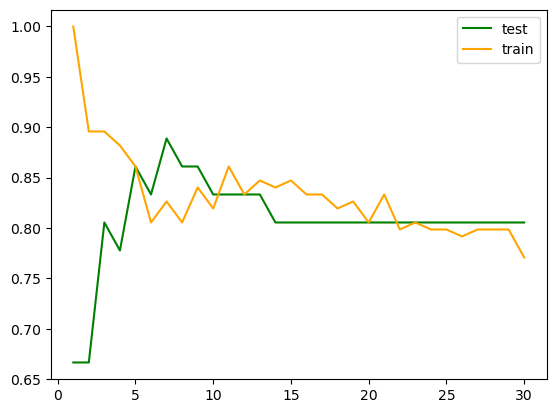

In [504]:
k_k=range(1,31)
train_accuracy=[]
test_accuracy=[]
for i in k_k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
optimal_k=k_k[np.argmax(test_accuracy)]
print(optimal_k)
plt.plot(k_k,test_accuracy,label="test",color="green")
plt.plot(k_k,train_accuracy,label="train",color="orange")
plt.legend()

### From the plot graph,the n_neighbors of 7 have more accuracy value which is nearby 90%,so we can select 7 as a kneighbor

In [505]:
knc=KNeighborsClassifier(n_neighbors=7)
knc.fit(x_train,y_train)
y_pre_knc=knc.predict(x_test)
y_pre_knc

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [506]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_knc)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_knc)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_knc))

ACCURACY_SCORE:  88.88888888888889



F1__SCORE:  88.8888888888889



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       4  16


In [507]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_knc))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



## TRAINING ACCURACY:

In [508]:
train_pre_knc=knc.predict(x_train)

In [509]:
accuracy_score(train_pre_knc,y_train)*100

82.63888888888889

# HYPERPARAMETER TUNING ON KNEAREST KNEIGHBORS

from sklearn.model_selection import cross_val_score
k_knc=range(2,21)
cv_scores_knc=[]
for i in k_knc:
    scores_knc=cross_val_score(KNeighborsClassifier(n_neighbors=7),x_train,y_train,cv=i,scoring="f1")
    cv_scores_knc.append(scores_knc.mean())
    print(i,scores_knc.mean(),scores_knc.std())
best_k_knc=k_knc[cv_scores_knc.index(max(cv_scores_knc))]
print("The best cross_validation in KNC:",best_k_knc)

In [510]:
param_knc={
    "weights":["uniform","distance"],
    "metric":["euclidean","manhattan","minkowshi"],
    "p":[1,2]
}

In [511]:
grid_knn=GridSearchCV(KNeighborsClassifier(),param_grid=param_knc,cv=5,scoring="f1",verbose=1,n_jobs=-1)

In [512]:
grid_knn.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowshi'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

print("best_params:",grid_knn.best_params_)
print("best_estimators:",grid_knn.best_estimator_)
print("best_score",grid_knn.best_score_)

In [513]:
hp_knn=KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1,
                     weights='distance')

In [514]:
hp_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1, weights='distance')

In [515]:
y_pre_hp_knn=hp_knn.predict(x_test)
y_pre_hp_knn

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [516]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_knn)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_knn)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_knn))

ACCURACY_SCORE:  88.88888888888889



F1__SCORE:  88.8888888888889



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       4  16


In [517]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_knn))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



## KNEAREST NEIGHBORS WITH SMOTE

OPTIMAL_K_KNN_SM: 5


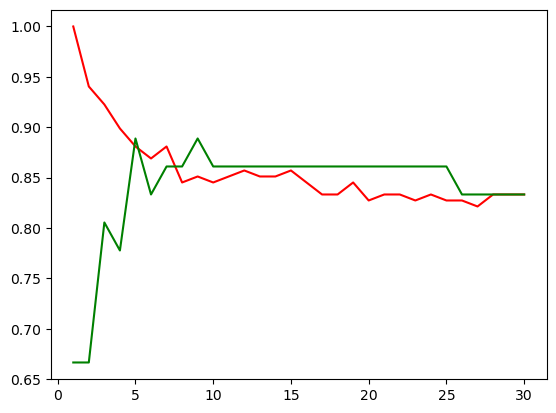

In [518]:
train_sm_acc=[]
test_sm_acc=[]
k_knn_sm=range(1,31)
for i in k_knn_sm:
    knn_sm=KNeighborsClassifier(n_neighbors=i)
    knn_sm.fit(x_smote,y_smote)
    train_sm_acc.append(knn_sm.score(x_smote,y_smote))
    test_sm_acc.append(knn_sm.score(x_test,y_test))
optimal_k_knn_sm=k_knn_sm[np.argmax(test_sm_acc)]
print("optimal_k_knn_sm:".upper(),optimal_k_knn_sm)
plt.plot(k_knn_sm,train_sm_acc,label="train",color="red")
plt.plot(k_knn_sm,test_sm_acc,label="test",color="green")

In [519]:
knn_sm=KNeighborsClassifier(n_neighbors=5)
knn_sm.fit(x_smote,y_smote)
y_pre_knn_sm=knn_sm.predict(x_test)
y_pre_knn_sm

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [520]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_knn_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_knn_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_knn_sm))

ACCURACY_SCORE:  88.88888888888889



F1__SCORE:  88.8888888888889



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       4  16


In [521]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_knn_sm))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



## KNN WITH SMOTE AND HYPERPARAMETER TUNING

In [522]:
k_knc_sm=range(2,21)
cv_scores_knc_sm=[]
for i in k_knc_sm:
    scores_knc_sm=cross_val_score(KNeighborsClassifier(n_neighbors=5),x_smote,y_smote,cv=i,scoring="f1")
    cv_scores_knc_sm.append(scores_knc_sm.mean())
    print(i,scores_knc_sm.mean(),scores_knc_sm.std())
best_k_knc_sm=k_knc_sm[cv_scores_knc_sm.index(max(cv_scores_knc_sm))]
print("The best cross_validation in KNC_smote:",best_k_knc_sm)

2 0.8079836829836831 0.01252913752913748
3 0.8567901234567902 0.03103655577771987
4 0.8342968007602154 0.03953565067760017
5 0.8443775995246583 0.02632801607883494
6 0.8373752684097512 0.055253179787523296
7 0.831079789775442 0.04807620276983464
8 0.8392316017316017 0.07797074523377655
9 0.8453068946876997 0.07328324676004964
10 0.8511188510491916 0.08754811132716178
11 0.8466074774898306 0.09230707717606715
12 0.8578830891330891 0.0681066460374372
13 0.846869156484541 0.09003861565794301
14 0.8462252033680605 0.08973371997930304
15 0.8443149443149444 0.10187686873143673
16 0.8448232323232323 0.11474758311543466
17 0.8500636618283677 0.11319971236101102
18 0.8502845919512586 0.12871195056017676
19 0.8453823953823953 0.13723762469469386
20 0.8425974025974027 0.1078971857364901
The best cross_validation in KNC_smote: 12


In [523]:
param_knc_sm={
    "n_neighbors":range(1,21),
    "weights":["uniform","distance"],
    "metric":["euclidean","manhattan","minkowshi"],
    "p":[1,2]
}

In [524]:
knn_gsv=KNeighborsClassifier()

In [525]:
grid_knc_sm=GridSearchCV(estimator=knn_gsv,param_grid=param_knc_sm,verbose=2,n_jobs=-1,scoring="f1",cv=5)

In [526]:
grid_knc_sm.fit(x_smote,y_smote)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowshi'],
                         'n_neighbors': range(1, 21), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=2)

In [527]:
print("best_params:",grid_knc_sm.best_params_)
print("best_estimators:",grid_knc_sm.best_estimator_)
print("best_score",grid_knc_sm.best_score_)

best_params: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
best_estimators: KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1, weights='distance')
best_score 0.8710340802987862


In [528]:
hp_knn_sm=KNeighborsClassifier(metric='manhattan', p=1, weights='distance',n_neighbors=7)

In [529]:
hp_knn_sm.fit(x_smote,y_smote)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1, weights='distance')

In [530]:
y_pre_hp_knn_sm=hp_knn_sm.predict(x_test)
y_pre_hp_knn_sm

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [531]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_knn_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_knn_sm,average="weighted")*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_knn_sm))

ACCURACY_SCORE:  88.88888888888889



F1__SCORE:  88.88888888888889



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       4  16


In [532]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_knn_sm))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



# BAGGING WITH KNN CLASSIFIER WITH SMOTE

### Bagging is done by knn as a base estimator.KNN model provides 88.88% accuracy and f1 score

In [533]:
from sklearn.ensemble import BaggingClassifier

In [534]:
hp_knn_sm=KNeighborsClassifier(metric='manhattan', p=1, weights='distance',n_neighbors=7)

In [535]:
bag=BaggingClassifier(base_estimator=hp_knn_sm,n_estimators=100)

In [536]:
bag.fit(x_smote,y_smote)

BaggingClassifier(base_estimator=KNeighborsClassifier(metric='manhattan',
                                                      n_neighbors=7, p=1,
                                                      weights='distance'),
                  n_estimators=100)

In [537]:
y_pre_bag=bag.predict(x_test)
y_pre_bag

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [538]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_bag)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_bag)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_bag))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  85.71428571428571



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       5  15


In [539]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_bag))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



## BAGGING WITH SMOTE AND HYPERPARAMTER

In [540]:
from sklearn.model_selection import cross_val_score
k_bag=range(2,11)
cv_scores_bag=[]
for i in k_bag:
    score_bag=cross_val_score(BaggingClassifier(),x_smote,y_smote,cv=i,scoring="f1")
    cv_scores_bag.append(score_bag.mean())
    print(i,score_bag.mean(),score_bag.std())
best_k_bag=k_bag[cv_scores_bag.index(max(cv_scores_bag))]
print("The best cross_validation in Bagging:",best_k_bag)

2 0.6693259524584826 0.10175838489091504
3 0.8140025990903185 0.05192949365764664
4 0.80080664949086 0.0416930792265339
5 0.8109000150745882 0.048410559616474176
6 0.7561327561327561 0.08460653530475336
7 0.7910612414960241 0.08273012001341012
8 0.7680337206652996 0.059289754276718856
9 0.8086085311317509 0.08852664636908988
10 0.835828664799253 0.08617278192097498
The best cross_validation in Bagging: 10


In [541]:
param_bag={
    "n_estimators":np.arange(0,2001,100)
}

In [542]:
#grid_bag=GridSearchCV(estimator=BaggingClassifier(base_estimator=hp_knn_sm),param_grid=param_bag,scoring="f1",verbose=2,cv=10,n_jobs=-1)

In [543]:
#grid_bag.fit(x_smote,y_smote)

print("best_params_:",grid_bag.best_params_)
print("best_estimator:",grid_bag.best_estimator_)
print("best_score:",grid_bag.best_score_)

In [544]:
hp_bag=BaggingClassifier(base_estimator=KNeighborsClassifier(metric='manhattan',
                                                      n_neighbors=7, p=1,
                                                      weights='distance'),n_estimators=300)

In [545]:
hp_bag.fit(x_smote,y_smote)

BaggingClassifier(base_estimator=KNeighborsClassifier(metric='manhattan',
                                                      n_neighbors=7, p=1,
                                                      weights='distance'),
                  n_estimators=300)

In [546]:
y_pre_hp_bag=hp_bag.predict(x_test)

In [547]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_bag)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_bag)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_bag))

ACCURACY_SCORE:  88.88888888888889



F1__SCORE:  88.8888888888889



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       4  16


In [548]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_bag))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



# RANDOM FOREST 

In [549]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(x_train,y_train)
y_pre_rf=rf.predict(x_test)

In [550]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_rf)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_rf)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_rf))

ACCURACY_SCORE:  80.55555555555556



F1__SCORE:  80.0



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      15   1
1                       6  14


In [551]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_rf))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



## HYPERPARAMETER TUNING FOR RF

In [552]:
cv_scores_rf=[]
k_rf=range(2,11)
for i in k_rf:
    scores_rf=cross_val_score(RandomForestClassifier(random_state=42),x_train,y_train,cv=i,scoring="f1",verbose=0)
    cv_scores_rf.append(scores_rf.mean())
    print(i,scores_rf.mean(),scores_rf.std())
best_k_rf=k_rf[np.argmax(cv_scores_rf)]
print("The best cross_validation in Random Forest:",best_k_rf)

2 0.751851851851852 0.04814814814814811
3 0.7679217679217678 0.008631567818644034
4 0.7470033670033671 0.031489456848221395
5 0.7765567765567767 0.052866673930441546
6 0.7862433862433864 0.06582146683633437
7 0.7728017522798593 0.0700983266703604
8 0.7696307369101487 0.053453097804941924
9 0.7708868473574355 0.11459832490503477
10 0.7597435897435898 0.11215450271225173
The best cross_validation in Random Forest: 6


In [553]:
param_rf={
    "n_estimators":[x for x in np.arange(100,301,100)],
    "max_depth":(list(range(1,6))),
    "min_samples_split":(list(range(1,6))),
    "min_samples_leaf":(list(range(1,6))),
    "max_features":['sqrt','log2'],
    "bootstrap":[True,False]
}

In [554]:
#grid_rf=GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_rf,cv=best_k_rf,verbose=3,n_jobs=-1,scoring="f1")

In [555]:
#grid_rf.fit(x_train,y_train)

print("best_params_:",grid_rf.best_params_)
print("best_estimator:",grid_rf.best_estimator_)
print("best_score:",grid_rf.best_score_)

In [556]:
hp_rf=RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=4,
                       n_estimators=200, random_state=42)

In [557]:
hp_rf.fit(x_train,y_train)
y_pre_hp_rf=hp_rf.predict(x_test)

In [558]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_rf)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_rf)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_rf))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  85.71428571428571



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       5  15


In [559]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_rf))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



## RF WITH SMOTE

In [560]:
rf_sm=RandomForestClassifier(random_state=42,n_estimators=100)
rf_sm.fit(x_smote,y_smote)
y_pre_rf_sm=rf_sm.predict(x_test)

In [561]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_rf_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_rf_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_rf_sm))

ACCURACY_SCORE:  83.33333333333334



F1__SCORE:  83.33333333333334



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      15   1
1                       5  15


In [562]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_rf_sm))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



## RANDOM FOREST WITH SMOTE BY DOING THE HYPERPARAMETER

In [563]:
cv_scores_rf_sm=[]
k_rf_sm=range(2,21)
for i in k_rf:
    scores_rf_sm=cross_val_score(RandomForestClassifier(random_state=42),x_smote,y_smote,cv=i,scoring="f1")
    cv_scores_rf_sm.append(scores_rf_sm.mean())
    print(i,scores_rf_sm.mean(),scores_rf_sm.std())
best_k_rf_sm=k_rf_sm[np.argmax(cv_scores_rf_sm)]
print("The best cross_validation in Random Forest:",best_k_rf_sm)

2 0.7625994694960212 0.01900972590627764
3 0.8121212121212121 0.04535342286998711
4 0.8263840401943672 0.057349754412380695
5 0.8362592644713388 0.05004625695108657
6 0.8582561728395062 0.0695525992487833
7 0.8427917010525706 0.0625146753806766
8 0.836359921542988 0.0721556771104315
9 0.8397173489278753 0.08135897409795363
10 0.8337856897144823 0.06610973300906542
The best cross_validation in Random Forest: 6


In [564]:
param_rf_sm={
    "n_estimators":[x for x in np.arange(100,601,100)],
    "max_depth":(list(range(1,7))),
    "min_samples_split":(list(range(1,7))),
    "min_samples_leaf":(list(range(1,7))),
    "max_features":['sqrt','log2'],
    "bootstrap":[True,False]
}

In [565]:
#grid_rf_sm=GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_rf_sm,cv=best_k_rf_sm,verbose=3,n_jobs=-1,scoring="f1")

In [566]:
#grid_rf_sm.fit(x_smote,y_smote)

print("best_params_:",grid_rf_sm.best_params_)
print("best_estimator:",grid_rf_sm.best_estimator_)
print("best_score:",grid_rf_sm.best_score_)

In [567]:
hp_rf_sm=RandomForestClassifier(max_depth=4, min_samples_leaf=2, random_state=42)

In [568]:
hp_rf_sm.fit(x_smote,y_smote)
y_pre_hp_rf_sm=hp_rf_sm.predict(x_test)

In [569]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_rf_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_rf_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_rf_sm))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  85.71428571428571



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      16   0
1                       5  15


In [570]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_rf_sm))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



# XGBOOSTING

In [571]:
!pip install xgboost

In [572]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [573]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pre_xgb=xgb.predict(x_test)

In [574]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_xgb)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_xgb)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_xgb))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  86.48648648648648



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      15   1
1                       4  16


In [575]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_xgb))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



## XGB WITH HYPERPARAMETER

In [576]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [577]:
cv_scores_xgb=[]
k_xgb=range(2,11)
for i in k_xgb:
    scores_xgb=cross_val_score(XGBClassifier(random_state=42),x_train,y_train,cv=i,scoring="f1")
    cv_scores_xgb.append(scores_xgb.mean())
    print(i,scores_xgb.mean(),scores_xgb.std())
best_k_xgb=k_xgb[np.argmax(cv_scores_xgb)]
print("The best cross_validation in Random Forest:",best_k_xgb)

2 0.7241379310344827 0.0
3 0.7390838206627679 0.06317248285304847
4 0.7448906192065258 0.09404343816435662
5 0.7558977254629429 0.11262038771245275
6 0.7451987812668928 0.10643604279401389
7 0.7571895424836601 0.08648380944464862
8 0.7546169108669107 0.165346138940466
9 0.736607528274195 0.14394870305813132
10 0.7448551448551448 0.1443464491054903
The best cross_validation in Random Forest: 7


In [578]:
param_xgb={
              'gamma': [0.1,0.01,0.001],
              'learning_rate': [0.01, 0.03, 0.06, 0.08],
              'max_depth': [5,6,7,8],
               "n_estimators":[200,400,800],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]
}


In [579]:
gscv_xgb=XGBClassifier(random_state=42)

In [580]:
#grid_xgb=GridSearchCV(estimator=gscv_xgb,param_grid=param_xgb,cv=7,n_jobs=-1,scoring="f1",refit=True,verbose=3)

In [581]:
#grid_xgb.fit(x_train,y_train)

print("best_params_:",grid_xgb.best_params_)
print("best_estimator:",grid_xgb.best_estimator_)
print("best_score:",grid_xgb.best_score_)

In [582]:

hp_xgb=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None,monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None,reg_alpha=0.4,reg_lambda=0,random_state=42)

In [583]:
hp_xgb.fit(x_train,y_train)
y_pre_hp_xgb=hp_xgb.predict(x_test)

In [584]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_xgb)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_xgb)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_xgb))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  86.48648648648648



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      15   1
1                       4  16


In [585]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_xgb))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



## XGBOOSTING WITH SMOTE

In [586]:
xgb_sm=XGBClassifier(random_state=42)
xgb_sm.fit(x_smote,y_smote)
y_pre_xgb_sm=xgb_sm.predict(x_test)

In [587]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_xgb_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_xgb_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_xgb_sm))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  86.48648648648648



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      15   1
1                       4  16


In [588]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_xgb_sm))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



# XGBOOSTING BY DOING HYPERPARAMTERT WITH SMOTE 

In [589]:
cv_scores_xgb_sm=[]
k_xgb_sm=range(2,11)
for i in k_xgb_sm:
    scores_xgb_sm=cross_val_score(XGBClassifier(random_state=42),x_smote,y_smote,cv=i,scoring="f1")
    cv_scores_xgb_sm.append(scores_xgb_sm.mean())
    print(i,scores_xgb_sm.mean(),scores_xgb_sm.std())
best_k_xgb_sm=k_xgb_sm[np.argmax(cv_scores_xgb_sm)]
print("The best cross_validation in Random Forest:",best_k_xgb_sm)

2 0.8095238095238095 0.0
3 0.793778801843318 0.07420523517119497
4 0.8290703199239785 0.048181584253541326
5 0.8261747672041789 0.05230076749475436
6 0.8311697949258202 0.0839099472745286
7 0.8349259436215959 0.06537793746587296
8 0.8357589873894222 0.08408868795906378
9 0.8463822956083019 0.0714813185021218
10 0.8267234262125903 0.08942088338731888
11 0.8102650304944141 0.10031794582516344
12 0.8058862433862434 0.08770394346664374
13 0.812702267566521 0.10252614757495794
14 0.8344536415964987 0.08596632269728306
15 0.8195152995152994 0.09532920042258522
16 0.8339375901875903 0.1338707523464982
17 0.8410024615906969 0.08512598410930844
18 0.8348524931858265 0.09874010710800234
19 0.830470114680641 0.1455403679709858
20 0.8286507936507936 0.16435086124918374
The best cross_validation in Random Forest: 9


In [590]:
param_xgb_sm={
              'gamma': [0.1,0.01,0.001],
              'learning_rate': [0.01, 0.03, 0.06, 0.08],
              'max_depth': [5,6,7,8],
               "n_estimators":[200,400,800],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]
}

In [591]:
#grid_xgb_sm=GridSearchCV(estimator=XGBClassifier(random_state=42),param_grid=param_xgb_sm,cv=4,n_jobs=-1,scoring="f1",refit=True,verbose=3)

In [592]:
#grid_xgb_sm.fit(x_smote,y_smote)

print("best_params_:",grid_xgb_sm.best_params_)
print("best_estimator:",grid_xgb_sm.best_estimator_)
print("best_score:",grid_xgb_sm.best_score_)

In [593]:
hp_xgb_sm=XGBClassifier(reg_alpha= 0,reg_lambda=0.2,base_score=None,
                        booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None,monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=42)

In [594]:
hp_xgb_sm.fit(x_smote,y_smote)
y_pre_hp_xgb_sm=hp_xgb_sm.predict(x_test)

In [595]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_xgb_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_xgb_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_xgb_sm))

ACCURACY_SCORE:  86.11111111111111



F1__SCORE:  86.48648648648648



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      15   1
1                       4  16


In [596]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_xgb_sm))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



# GRADIENT BOOSTING ALGORITHMS

In [597]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [598]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [599]:
y_pre_gb=gb.predict(x_test)

In [600]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_gb)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_gb)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_gb))

ACCURACY_SCORE:  80.55555555555556



F1__SCORE:  81.08108108108108



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      14   2
1                       5  15


# GRADIENT BOOSTING WITH HYPERPARAMETER TUNING

In [621]:
cv_scores_gb_sm=[]
k_gb_sm=range(2,11)
for i in k_gb_sm:
    scores_gb_sm=cross_val_score(GradientBoostingClassifier(random_state=42),x_train,y_train,cv=i,scoring="f1")
    cv_scores_gb_sm.append(scores_gb_sm.mean())
    print(i,scores_gb_sm.mean(),scores_gb_sm.std())
best_k_gb_sm=k_gb_sm[np.argmax(cv_scores_gb_sm)]
print("The best cross_validation in GB:",best_k_gb_sm)

2 0.6832358674463936 0.053606237816764046
3 0.747978747978748 0.021836548483430734
4 0.7318629646215853 0.04586192674907919
5 0.7172390572390572 0.10290487733163757
6 0.7459210265711813 0.04105517485301668
7 0.7016806722689076 0.07177785747937686
8 0.7026314371902608 0.11402267829459542
9 0.692221993692582 0.1373317960939844
10 0.7281740481740482 0.1322435016192159
The best cross_validation in GB: 3


In [602]:
param_gb={
              'learning_rate': [0.01, 0.03, 0.06, 0.08,0.1],
              'max_depth': [5,6,7,8],
              'n_estimators':[50,100,200,400,600,800],
              'min_samples_leaf':[1,2,4,6],
              'subsample':[0.8,1.0],
              'min_samples_split':[2,5,10]
}

In [603]:
#grid_gb=GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=param_gb,cv=3,scoring="f1",n_jobs=-1,verbose=3)

In [604]:
#grid_gb.fit(x_train,y_train)

print("best_params_:",grid_gb.best_params_)
print("best_estimator:",grid_gb.best_estimator_)
print("best_score:",grid_gb.best_score_)

In [605]:
hp_gb=GradientBoostingClassifier(learning_rate=0.08, max_depth=8,
                           min_samples_split=10, n_estimators=50,
                           random_state=42, subsample=0.8)

In [606]:
hp_gb.fit(x_train,y_train)
y_pre_hp_gb=hp_gb.predict(x_test)

In [607]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_hp_gb)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_hp_gb)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_hp_gb))

ACCURACY_SCORE:  80.55555555555556



F1__SCORE:  80.0



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      15   1
1                       6  14


In [608]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_hp_gb))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



## GRADIENT BOOSTING WITH SMOTE

In [609]:
gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

GradientBoostingClassifier(random_state=42)

In [610]:
y_pre_gb_sm=gb_sm.predict(x_test)

In [611]:
print("ACCURACY_SCORE: ",accuracy_score(y_test,y_pre_gb_sm)*100)
print("\n\n")
print("F1__SCORE: ",f1_score(y_test,y_pre_gb_sm)*100)
print("\n\n")
print("CROSS_TAB\n\n",pd.crosstab(y_test,y_pre_gb_sm))

ACCURACY_SCORE:  83.33333333333334



F1__SCORE:  83.33333333333334



CROSS_TAB

 col_0                   0   1
heart_disease_present        
0                      15   1
1                       5  15


In [612]:
print("CLASSIFICATION_REPORT: \n")
print(classification_report(y_test,y_pre_gb_sm))

CLASSIFICATION_REPORT: 

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



# CONCLUSION:

In [613]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## MODEL WITH OUT APPLYING SMOTE 

In [614]:
LOG_REG=f1_score(y_test,y_predict_lr)*100
SVM=f1_score(y_test,y_pre_svc)*100
DT=f1_score(y_test,y_pre_hp_dt)*100
KNN=f1_score(y_test,y_pre_knc)*100
RF=f1_score(y_test,y_pre_hp_rf)*100
XGB=f1_score(y_test,y_pre_xgb)*100
GB=f1_score(y_test,y_pre_gb)*100

In [615]:
print(LOG_REG,SVM,DT,KNN,RF,XGB,GB)

85.71428571428571 85.71428571428571 78.7878787878788 88.8888888888889 85.71428571428571 86.48648648648648 81.08108108108108


In [616]:
Model_Name=["LOG REG","SVM","DT","KNN","RF","XGB","GB"]
F1_SCORE=[LOG_REG,SVM,DT,KNN,RF,XGB,GB]

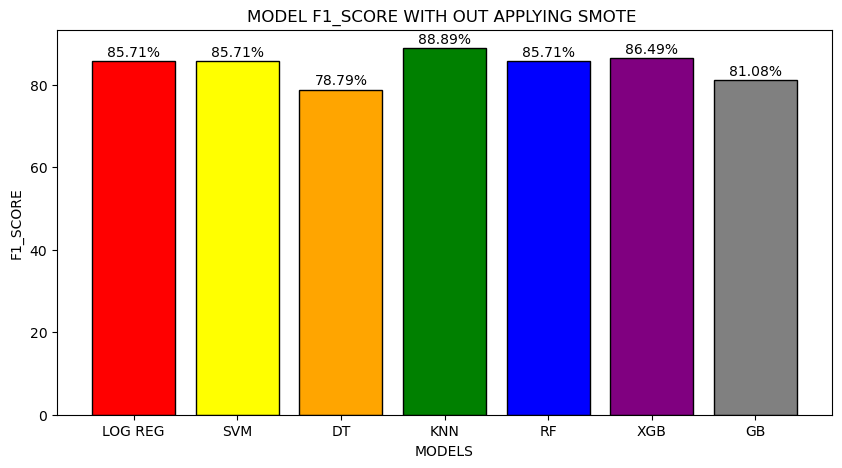

In [617]:
plt.figure(figsize=(10,5))
plt.bar(Model_Name,F1_SCORE,color=["red","yellow","orange","green","blue","purple","grey"],edgecolor="black")
plt.title("MODEL F1_SCORE WITH OUT APPLYING SMOTE ")
plt.xlabel("MODELS")
plt.ylabel("F1_SCORE")
for i in range(len(F1_SCORE)):
    plt.text(i,F1_SCORE[i]+0.5,str(round(F1_SCORE[i],2))+"%",ha="center",va="bottom")
plt.show()

# <font color= blue>KNEAREST NEIGHBOR MODEL </font>WITHOUT APPLYING SMOTE MAKES <font color= green>88.89% </font>OF PERFORMANCE 

## MODEL'S F1_SCORE BY APPLYING SMOTE

In [618]:
LOG_REG_smote=f1_score(y_test,y_pre_lrsm)*100
SVM_smote=f1_score(y_test,y_pre_svc_sm)*100
DT_smote=f1_score(y_test,y_pre_hp_dt_sm)*100
KNN_smote=f1_score(y_test,y_pre_knn_sm)*100
BAG_smote=f1_score(y_test,y_pre_bag)*100
RF_smote=f1_score(y_test,y_pre_hp_rf_sm)*100
XGB_smote=f1_score(y_test,y_pre_hp_xgb_sm)*100
GB_smote=f1_score(y_test,y_pre_gb_sm)*100

In [619]:
Model_Name_smote=["LOG REG","SVM","DT","KNN","BAGGING","RF","XGB","GB"]
F1_SCORE_smote=[LOG_REG_smote,SVM_smote,DT_smote,KNN_smote,BAG_smote,RF_smote,XGB_smote,GB_smote]

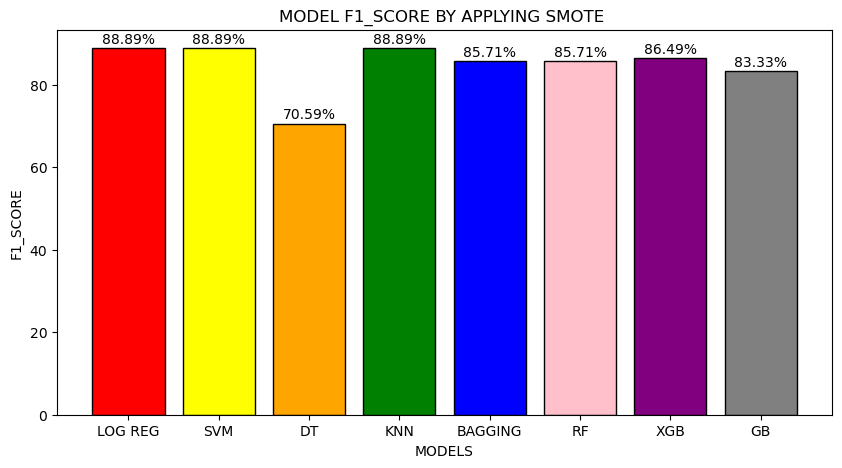

In [620]:
plt.figure(figsize=(10,5))
plt.bar(Model_Name_smote,F1_SCORE_smote,color=["red","yellow","orange","green","blue","pink","purple","grey"],edgecolor="black")
plt.title("MODEL F1_SCORE BY APPLYING SMOTE ")
plt.xlabel("MODELS")
plt.ylabel("F1_SCORE")
for i in range(len(F1_SCORE_smote)):
    plt.text(i,F1_SCORE_smote[i]+0.5,str(round(F1_SCORE_smote[i],2))+"%",ha="center",va="bottom")
plt.show()

# <font color= green>LOGISTIC REGRESSION MODEL</font>,<font color= blue>KNEAREST NEIGHBOR MODEL</font> AND <font color= green>BAGGING WITH KNN TECHNIQUES </font>PROVIDES <font color= green>88.89% </font>OF PERFORMANCE BY APPLYING SMOTE.
# SO WE CAN USE ANY ONE OF THE ABOVE.